# Contact Moderation

<h3>Analysis on Email conversations between users</h3>

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

warnings.filterwarnings('ignore')

##### Defining Functions

In [2]:
def plotPie(df,col):
    # Calculate the value counts and percentages
    value_counts = df[col].value_counts()
    percentages = (value_counts / len(df)) * 100

    # Plot the pie chart
    plt.figure(figsize=(5,5))
    plt.pie(percentages, labels=percentages.index, autopct='%1.0f%%', startangle=120)
    plt.title(col)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [3]:
# Function to count messages containing phone numbers in the 'Body'
def count_messages_with_phone_numbers(body_messages):
    phone_number_count = 0
    for body in email_df['Body'].astype(str):
        if re.search(r'\d{10}', body):
            phone_number_count += 1
    return phone_number_count

#### Loading DFs 

In [4]:
mods = pd.read_csv('/Users/rajathadri_as/Documents/Mods04.csv')

In [5]:
email = pd.read_csv('/Users/rajathadri_as/Documents/Email04.csv')

#### FirstView

mods.head()

In [6]:
mods.head()

ModerationReportId  ModerationAction  BannedRecipientNotificationRequired  \
0                   1                 6                                    0   
1                   4                 6                                    0   
2                   7                 6                                    0   
3                  10                 3                                    0   
4                  13                 3                                    0   

   RedactedEmailNotificationRequired  ManuallyModeratedBy  \
0                                  0                  8.0   
1                                  0                  8.0   
2                                  0                  8.0   
3                                  0                  NaN   
4                                  0                  NaN   

        ModerationDate  ManualRejectionReasonId  OverrideType  Email_EmailId  \
0  2023-07-19 06:31:26                      NaN           NaN             25   
1  2023-07-19 06:31:28                      NaN           NaN             28   
2  2023-07-19 06:31:29                      NaN           NaN             31   
3  2023-07-19 06:06:18                      NaN           NaN              1   
4  2023-07-19 06:07:10                      NaN           NaN              7   

   GateKeeperModerationAction  ModeratorType MatchedCriteria  \
0                           5            3.0           gmail   
1                           5            3.0           gmail   
2                           5            3.0           gmail   
3                           5            NaN             NaN   
4                           5            NaN             NaN   

           Description  Occurrences  MatchedRuleSetId  ModuleType  
0  for catching emails          1.0           13140.0         3.0  
1  for catching emails          1.0           13140.0         3.0  
2  for catching emails          1.0           13140.0         3.0  
3                  NaN          NaN               NaN         NaN  
4                  NaN          NaN               NaN         NaN

In [7]:
email.head()

ModerationReportId  ModerationAction  BannedRecipientNotificationRequired  \
0                   1                 6                                    0   
1                   4                 6                                    0   
2                   7                 6                                    0   
3                  10                 3                                    0   
4                  13                 3                                    0   

   ManuallyModeratedBy       ModerationDate  OverrideType  \
0                  8.0  2023-07-19 06:31:26           NaN   
1                  8.0  2023-07-19 06:31:28           NaN   
2                  8.0  2023-07-19 06:31:29           NaN   
3                  NaN  2023-07-19 06:06:18           NaN   
4                  NaN  2023-07-19 06:07:10           NaN   

   GateKeeperModerationAction                      Sender  \
0                           5         deji90673@gmail.com   
1                           5         deji90673@gmail.com   
2                           5         deji90673@gmail.com   
3                           5                me@enuuu.com   
4                           5  rebecca0607evans@gmail.com   

                           Recipient  \
0              heidswood@hotmail.com   
1              promedia333@gmail.com   
2          hawkinsleslie69@yahoo.com   
3  marta.markow@fridaymediagroup.com   
4            herby432001@yahoo.co.uk   

                                             Subject  ...         Country  \
0  Message regarding ad: Extremely reliable car. ...  ...  United Kingdom   
1         Message regarding ad: 2005 SUBARU FORESTER  ...  United Kingdom   
2  Message regarding ad: Recently fully serviced ...  ...  United Kingdom   
3                              New Message from site  ...  UNITED KINGDOM   
4  Message regarding ad: Home help needed by reti...  ...  UNITED KINGDOM   

  OriginatingSiteId    ThreadId  \
0                 1     5075644   
1                 1     5075647   
2                 1     5075650   
3                 1  PM_5515048   
4                 1     5075638   

                                           AdvertUrl      AdRef LanguageCode  \
0  https://www.friday-ad.co.uk/extremely-reliable...  FF32862CB           en   
1  https://www.friday-ad.co.uk/2005-subaru-forest...  FF325406C           en   
2  https://www.friday-ad.co.uk/recently-fully-ser...  FF32774F8           en   
3                                                NaN        NaN           en   
4  https://www.friday-ad.co.uk/home-help-needed-b...  FF309C136           en   

  VersionType  SpfValidationResult SourceType         SiteName  
0           2                    0          0  friday-ad.co.uk  
1           2                    0          0  friday-ad.co.uk  
2           2                    0          0  friday-ad.co.uk  
3           2                    0          0  friday-ad.co.uk  
4           2                    0          0  friday-ad.co.uk  

[5 rows x 26 columns]

#### Dataframe Information

In [8]:
mods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61623 entries, 0 to 61622
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ModerationReportId                   61623 non-null  int64  
 1   ModerationAction                     61623 non-null  int64  
 2   BannedRecipientNotificationRequired  61623 non-null  int64  
 3   RedactedEmailNotificationRequired    61623 non-null  int64  
 4   ManuallyModeratedBy                  7304 non-null   float64
 5   ModerationDate                       61623 non-null  object 
 6   ManualRejectionReasonId              0 non-null      float64
 7   OverrideType                         57 non-null     float64
 8   Email_EmailId                        61623 non-null  int64  
 9   GateKeeperModerationAction           61623 non-null  int64  
 10  ModeratorType                        11770 non-null  float64
 11  MatchedCriteria             

In [9]:
# ModerationDate has to be converted to Datetime dtype

In [10]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58270 entries, 0 to 58269
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ModerationReportId                   58270 non-null  int64  
 1   ModerationAction                     58270 non-null  int64  
 2   BannedRecipientNotificationRequired  58270 non-null  int64  
 3   ManuallyModeratedBy                  5755 non-null   float64
 4   ModerationDate                       58270 non-null  object 
 5   OverrideType                         23 non-null     float64
 6   GateKeeperModerationAction           58270 non-null  int64  
 7   Sender                               58270 non-null  object 
 8   Recipient                            58270 non-null  object 
 9   Subject                              56808 non-null  object 
 10  Body                                 58214 non-null  object 
 11  MostRecentMessage           

In [11]:
# DateSent and ModerationDate - Datetime
# ThreadId - int64

In [12]:
mods.describe().T

count          mean           std  \
ModerationReportId                   61623.0  87573.912224  50434.292744   
ModerationAction                     61623.0      2.812034      0.777510   
BannedRecipientNotificationRequired  61623.0      0.003067      0.055296   
RedactedEmailNotificationRequired    61623.0      0.000000      0.000000   
ManuallyModeratedBy                   7304.0     52.223713     20.083785   
ManualRejectionReasonId                  0.0           NaN           NaN   
OverrideType                            57.0      1.964912      0.185637   
Email_EmailId                        61623.0  87648.044642  50515.345486   
GateKeeperModerationAction           61623.0      4.988089      0.157017   
ModeratorType                        11770.0      2.576636      0.620779   
Occurrences                          11770.0      1.109941      0.817003   
MatchedRuleSetId                     11770.0  42434.993713  28040.376913   
ModuleType                           11770.0      5.652506      3.607174   

                                       min      25%      50%       75%  \
ModerationReportId                     1.0  44108.5  88237.0  130994.5   
ModerationAction                       0.0      3.0      3.0       3.0   
BannedRecipientNotificationRequired    0.0      0.0      0.0       0.0   
RedactedEmailNotificationRequired      0.0      0.0      0.0       0.0   
ManuallyModeratedBy                    3.0     56.0     62.0      65.0   
ManualRejectionReasonId                NaN      NaN      NaN       NaN   
OverrideType                           1.0      2.0      2.0       2.0   
Email_EmailId                          1.0  44117.5  88249.0  131210.5   
GateKeeperModerationAction             0.0      5.0      5.0       5.0   
ModeratorType                          1.0      2.0      3.0       3.0   
Occurrences                            1.0      1.0      1.0       1.0   
MatchedRuleSetId                     148.0  19472.0  29047.0   72375.0   
ModuleType                             1.0      3.0      4.0       8.0   

                                          max  
ModerationReportId                   174808.0  
ModerationAction                          6.0  
BannedRecipientNotificationRequired       1.0  
RedactedEmailNotificationRequired         0.0  
ManuallyModeratedBy                      66.0  
ManualRejectionReasonId                   NaN  
OverrideType                              2.0  
Email_EmailId                        175081.0  
GateKeeperModerationAction                5.0  
ModeratorType                             3.0  
Occurrences                              15.0  
MatchedRuleSetId                      82837.0  
ModuleType                               16.0

In [13]:
email.describe().T

count          mean           std  min  \
ModerationReportId                   58270.0  87404.500000  50463.733289  1.0   
ModerationAction                     58270.0      2.903123      0.575521  0.0   
BannedRecipientNotificationRequired  58270.0      0.003003      0.054720  0.0   
ManuallyModeratedBy                   5755.0     52.052129     20.267023  3.0   
OverrideType                            23.0      1.913043      0.288104  1.0   
GateKeeperModerationAction           58270.0      4.988124      0.156973  0.0   
EmailStatus                          58270.0      3.092775      0.575884  2.0   
OriginatingSiteId                    58270.0     16.701716     10.914912  1.0   
VersionType                          58270.0      2.000000      0.000000  2.0   
SpfValidationResult                  58270.0      0.285121      0.672098  0.0   
SourceType                           58270.0      0.168921      0.374685  0.0   

                                          25%      50%        75%       max  
ModerationReportId                   43702.75  87404.5  131106.25  174808.0  
ModerationAction                         3.00      3.0       3.00       6.0  
BannedRecipientNotificationRequired      0.00      0.0       0.00       1.0  
ManuallyModeratedBy                     56.00     58.0      65.00      66.0  
OverrideType                             2.00      2.0       2.00       2.0  
GateKeeperModerationAction               5.00      5.0       5.00       5.0  
EmailStatus                              3.00      3.0       3.00      13.0  
OriginatingSiteId                       14.00     14.0      17.00      46.0  
VersionType                              2.00      2.0       2.00       2.0  
SpfValidationResult                      0.00      0.0       0.00       4.0  
SourceType                               0.00      0.0       0.00       1.0

In [14]:
mods['RedactedEmailNotificationRequired'].value_counts()  # Drop column - NULL column

RedactedEmailNotificationRequired
0    61623
Name: count, dtype: int64

##### NULL counts

In [15]:
print(mods.isnull().sum())

ModerationReportId                         0
ModerationAction                           0
BannedRecipientNotificationRequired        0
RedactedEmailNotificationRequired          0
ManuallyModeratedBy                    54319
ModerationDate                             0
ManualRejectionReasonId                61623
OverrideType                           61566
Email_EmailId                              0
GateKeeperModerationAction                 0
ModeratorType                          49853
MatchedCriteria                        49853
Description                            53700
Occurrences                            49853
MatchedRuleSetId                       49853
ModuleType                             49853
dtype: int64


In [16]:
print(email.isnull().sum())

ModerationReportId                         0
ModerationAction                           0
BannedRecipientNotificationRequired        0
ManuallyModeratedBy                    52515
ModerationDate                             0
OverrideType                           58247
GateKeeperModerationAction                 0
Sender                                     0
Recipient                                  0
Subject                                 1462
Body                                      56
MostRecentMessage                         56
DateSent                                   0
EmailStatus                                0
References                             51545
IPAddress                              10038
Country                                14797
OriginatingSiteId                          0
ThreadId                                   0
AdvertUrl                              45582
AdRef                                  21072
LanguageCode                               0
VersionTyp

##### Unique values in each DF

In [17]:
# MODS

for i in mods.columns.tolist():
  print("Unique values in ",i,": ",mods[i].nunique())

Unique values in  ModerationReportId :  58270
Unique values in  ModerationAction :  4
Unique values in  BannedRecipientNotificationRequired :  2
Unique values in  RedactedEmailNotificationRequired :  1
Unique values in  ManuallyModeratedBy :  7
Unique values in  ModerationDate :  56430
Unique values in  ManualRejectionReasonId :  0
Unique values in  OverrideType :  2
Unique values in  Email_EmailId :  58270
Unique values in  GateKeeperModerationAction :  3
Unique values in  ModeratorType :  3
Unique values in  MatchedCriteria :  3084
Unique values in  Description :  56
Unique values in  Occurrences :  11
Unique values in  MatchedRuleSetId :  469
Unique values in  ModuleType :  10


In [18]:
mods['RedactedEmailNotificationRequired'].value_counts()

RedactedEmailNotificationRequired
0    61623
Name: count, dtype: int64

In [19]:
mods.shape

(61623, 16)

## Data Wrangling

#### Merging both DFs

In [20]:
df = mods.merge(email, on = 'ModerationReportId', how = 'left')

In [21]:
df.shape

(61623, 41)

In [22]:
df.head()

ModerationReportId  ModerationAction_x  \
0                   1                   6   
1                   4                   6   
2                   7                   6   
3                  10                   3   
4                  13                   3   

   BannedRecipientNotificationRequired_x  RedactedEmailNotificationRequired  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   

   ManuallyModeratedBy_x     ModerationDate_x  ManualRejectionReasonId  \
0                    8.0  2023-07-19 06:31:26                      NaN   
1                    8.0  2023-07-19 06:31:28                      NaN   
2                    8.0  2023-07-19 06:31:29                      NaN   
3                    NaN  2023-07-19 06:06:18                      NaN   
4                    NaN  2023-07-19 06:07:10                      NaN   

   OverrideType_x  Email_EmailId  GateKeeperModerationAction_x  ...  \
0             NaN             25                             5  ...   
1             NaN             28                             5  ...   
2             NaN             31                             5  ...   
3             NaN              1                             5  ...   
4             NaN              7                             5  ...   

          Country OriginatingSiteId    ThreadId  \
0  United Kingdom                 1     5075644   
1  United Kingdom                 1     5075647   
2  United Kingdom                 1     5075650   
3  UNITED KINGDOM                 1  PM_5515048   
4  UNITED KINGDOM                 1     5075638   

                                           AdvertUrl      AdRef  LanguageCode  \
0  https://www.friday-ad.co.uk/extremely-reliable...  FF32862CB            en   
1  https://www.friday-ad.co.uk/2005-subaru-forest...  FF325406C            en   
2  https://www.friday-ad.co.uk/recently-fully-ser...  FF32774F8            en   
3                                                NaN        NaN            en   
4  https://www.friday-ad.co.uk/home-help-needed-b...  FF309C136            en   

   VersionType  SpfValidationResult  SourceType         SiteName  
0            2                    0           0  friday-ad.co.uk  
1            2                    0           0  friday-ad.co.uk  
2            2                    0           0  friday-ad.co.uk  
3            2                    0           0  friday-ad.co.uk  
4            2                    0           0  friday-ad.co.uk  

[5 rows x 41 columns]

In [23]:
# Dataset Duplicate Value Count

len(df[df.duplicated()])

0

In [24]:
df.drop(['ManualRejectionReasonId','OverrideType_x','OverrideType_y','References','BannedRecipientNotificationRequired_y','ManuallyModeratedBy_y','ModerationAction_y','ModerationDate_y','GateKeeperModerationAction_y','RedactedEmailNotificationRequired','VersionType'],axis=1, inplace=True)

In [25]:
df['BannedRecipientNotificationRequired_x'].value_counts()

BannedRecipientNotificationRequired_x
0    61434
1      189
Name: count, dtype: int64

In [26]:
df.shape

(61623, 30)

In [27]:
df.columns

Index(['ModerationReportId', 'ModerationAction_x',
       'BannedRecipientNotificationRequired_x', 'ManuallyModeratedBy_x',
       'ModerationDate_x', 'Email_EmailId', 'GateKeeperModerationAction_x',
       'ModeratorType', 'MatchedCriteria', 'Description', 'Occurrences',
       'MatchedRuleSetId', 'ModuleType', 'Sender', 'Recipient', 'Subject',
       'Body', 'MostRecentMessage', 'DateSent', 'EmailStatus', 'IPAddress',
       'Country', 'OriginatingSiteId', 'ThreadId', 'AdvertUrl', 'AdRef',
       'LanguageCode', 'SpfValidationResult', 'SourceType', 'SiteName'],
      dtype='object')

In [28]:
df.dtypes

ModerationReportId                         int64
ModerationAction_x                         int64
BannedRecipientNotificationRequired_x      int64
ManuallyModeratedBy_x                    float64
ModerationDate_x                          object
Email_EmailId                              int64
GateKeeperModerationAction_x               int64
ModeratorType                            float64
MatchedCriteria                           object
Description                               object
Occurrences                              float64
MatchedRuleSetId                         float64
ModuleType                               float64
Sender                                    object
Recipient                                 object
Subject                                   object
Body                                      object
MostRecentMessage                         object
DateSent                                  object
EmailStatus                                int64
IPAddress           

In [31]:
df[['ModerationDate_x','DateSent']] = df[['ModerationDate_x','DateSent']].astype('datetime64[ns]')

In [32]:
# Duplicate Dataset

db = df

In [33]:
df = df[['ModerationAction_x','ModerationDate_x', 'GateKeeperModerationAction_x','MatchedCriteria', 'Description', 'Occurrences','ModuleType', 'Sender', 'Recipient', 'Subject','Body', 'MostRecentMessage', 'DateSent', 'EmailStatus', 'Country', 'OriginatingSiteId', 'ThreadId', 'LanguageCode', 'SpfValidationResult', 'SourceType', 'SiteName']]

In [34]:
df.columns

Index(['ModerationAction_x', 'ModerationDate_x',
       'GateKeeperModerationAction_x', 'MatchedCriteria', 'Description',
       'Occurrences', 'ModuleType', 'Sender', 'Recipient', 'Subject', 'Body',
       'MostRecentMessage', 'DateSent', 'EmailStatus', 'Country',
       'OriginatingSiteId', 'ThreadId', 'LanguageCode', 'SpfValidationResult',
       'SourceType', 'SiteName'],
      dtype='object')

##### Handling NULL values

In [35]:
df.isnull().sum()

ModerationAction_x                  0
ModerationDate_x                    0
GateKeeperModerationAction_x        0
MatchedCriteria                 49853
Description                     53700
Occurrences                     49853
ModuleType                      49853
Sender                              0
Recipient                           0
Subject                          1466
Body                               56
MostRecentMessage                  56
DateSent                            0
EmailStatus                         0
Country                         15927
OriginatingSiteId                   0
ThreadId                            0
LanguageCode                        0
SpfValidationResult                 0
SourceType                          0
SiteName                            0
dtype: int64

In [36]:
df['MatchedCriteria'].fillna('No Criteria', inplace=True)
df['Description'].fillna('No Description', inplace=True)
df['Subject'].fillna('No Subject', inplace=True)
df['Country'].fillna('No Country', inplace=True)

In [37]:
df.isnull().sum()

ModerationAction_x                  0
ModerationDate_x                    0
GateKeeperModerationAction_x        0
MatchedCriteria                     0
Description                         0
Occurrences                     49853
ModuleType                      49853
Sender                              0
Recipient                           0
Subject                             0
Body                               56
MostRecentMessage                  56
DateSent                            0
EmailStatus                         0
Country                             0
OriginatingSiteId                   0
ThreadId                            0
LanguageCode                        0
SpfValidationResult                 0
SourceType                          0
SiteName                            0
dtype: int64

In [38]:
# Creating a new DF to analyze the messages sent.

In [39]:
df['ModuleType'].value_counts()

ModuleType
3.0     3983
8.0     1914
11.0    1740
4.0     1711
1.0      968
12.0     567
7.0      421
2.0      339
16.0      79
13.0      48
Name: count, dtype: int64

#### Creating new "Moderated" column

In [40]:
df['Moderated'] = df['ModuleType'].notnull().astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61623 entries, 0 to 61622
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ModerationAction_x            61623 non-null  int64         
 1   ModerationDate_x              61623 non-null  datetime64[ns]
 2   GateKeeperModerationAction_x  61623 non-null  int64         
 3   MatchedCriteria               61623 non-null  object        
 4   Description                   61623 non-null  object        
 5   Occurrences                   11770 non-null  float64       
 6   ModuleType                    11770 non-null  float64       
 7   Sender                        61623 non-null  object        
 8   Recipient                     61623 non-null  object        
 9   Subject                       61623 non-null  object        
 10  Body                          61567 non-null  object        
 11  MostRecentMessage           

<h2> Analysis </h2>

### General Analysis

### Is ModerationDate the same as DateSent?
##### - No

In [42]:
same_values = df[df['ModerationDate_x'] == df['DateSent']]

# Printing the count of the same values and the DataFrame containing them
print("Number of same values:", len(same_values))

Number of same values: 2590


#### marinepromoter.com

In [43]:
df_marinepromoter = df[df['SiteName']=='marinepromoter.com']

In [44]:
df_marinepromoter[['ModerationAction_x','EmailStatus','Sender','Recipient','Subject','MostRecentMessage']].to_excel('MarinePromoterContact.xlsx', index=False)

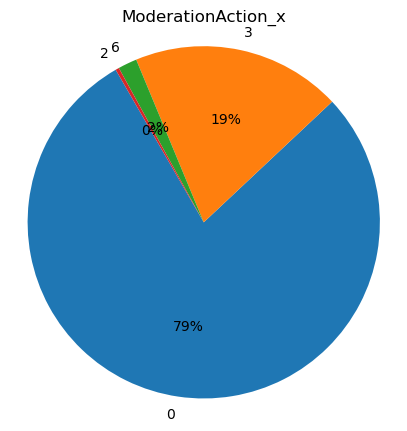

In [45]:
plotPie(df_marinepromoter,'ModerationAction_x')

<p style="color: red;">MarinePromoter site is majorly used for spam messaging </p>

## FAD

In [46]:
df_fad = df[df['SiteName']=='friday-ad.co.uk']

In [47]:
df_fad.shape

(9079, 22)

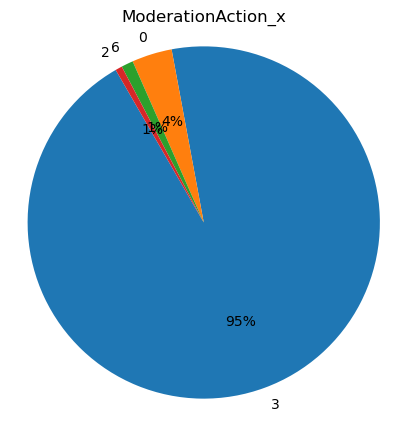

In [48]:
plotPie(df_fad,'ModerationAction_x')

In [49]:
# Group the DataFrame by 'Sender' column and get the total count
senderCount_fad = df_fad.groupby('Sender').agg(Total_Count=('Sender', 'size'),ModerationOkay=('ModerationAction_x', lambda x: (x == 3).sum()))

senderCount_fad.sort_values(by='Total_Count', ascending = False)

Total_Count  ModerationOkay
Sender                                                  
eericpask@gmail.com                  181             149
simoncattell36@gmail.com             121             121
andrewblunden@aol.com                115             115
deji90673@gmail.com                  113               0
ilovelove2800@gmail.com              108             103
...                                  ...             ...
iangreen992@yahoo.com                  1               1
ianclayton77@mail.com                  1               1
ianbough20@gmail.com                   1               1
ian.gourley2@btinternet.com            1               1
juliamartin7ed@gmail.com               1               1

[3065 rows x 2 columns]

In [50]:
# Group the DataFrame by 'Receiver' column and get the total count
senderCount_fad = df_fad.groupby('Recipient').agg(Total_Count=('Recipient', 'size'),ModerationOkay=('ModerationAction_x', lambda x: (x == 3).sum()))

senderCount_fad.sort_values(by='Total_Count', ascending = False)

Total_Count  ModerationOkay
Recipient                                                
denisesnelling67@gmail.com            128             128
info@passionsouth.com                 100              99
jelena.zeba0504@gmail.com              95              95
fridayad@storm-escorts.co.uk           94              94
doborah2001@proton.me                  91              91
...                                   ...             ...
bn1bythesea@gmail.com                   1               1
bnspearce9@gmail.com                    1               1
leebaldwin60@gmail.com                  1               1
bob@bobsrecords.com                     1               1
007kentescorts1111@gmail.com            1               1

[2932 rows x 2 columns]

In [51]:
df_fad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9079 entries, 0 to 61616
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ModerationAction_x            9079 non-null   int64         
 1   ModerationDate_x              9079 non-null   datetime64[ns]
 2   GateKeeperModerationAction_x  9079 non-null   int64         
 3   MatchedCriteria               9079 non-null   object        
 4   Description                   9079 non-null   object        
 5   Occurrences                   1667 non-null   float64       
 6   ModuleType                    1667 non-null   float64       
 7   Sender                        9079 non-null   object        
 8   Recipient                     9079 non-null   object        
 9   Subject                       9079 non-null   object        
 10  Body                          9056 non-null   object        
 11  MostRecentMessage             9056

In [52]:
country_dfGroup = df_fad.groupby('Country').agg(Total_Count=('Country', 'size'), EmailNotAccepted=('ModerationAction_x', lambda x: (x != 3).sum()))
country_dfGroup.sort_values(by = 'Total_Count', ascending=False)

Total_Count  EmailNotAccepted
Country                                            
UNITED KINGDOM               3447               115
No Country                   3000                57
United Kingdom               2223               208
United States                 211                52
Netherlands                    52                41
Israel                         41                 0
Hong Kong SAR China            32                 0
Spain                          18                 0
Italy                           9                 7
Germany                         9                 9
Portugal                        6                 0
France                          5                 0
India                           4                 0
Norway                          4                 0
Belgium                         3                 0
Greece                          3                 0
Ireland                         3                 0
Russia                          2                 2
China                           2                 0
Poland                          2                 0
Sweden                          1                 0
Japan                           1                 0
United Arab Emirates            1                 0

In [53]:
df_fad['Moderated'].value_counts()

Moderated
0    7412
1    1667
Name: count, dtype: int64

#### Percent of users receiving the most number of messages
4.35%

In [54]:
# Group the DataFrame by 'Recipient' and count the total number of messages received
total_messages_received = df_fad.groupby('Recipient')['Body'].count().reset_index(name='Total_Messages_Received')

# Count the number of 'Moderated' = 1 messages with respect to each 'Recipient'
moderated_messages_count = df_fad[df_fad['Moderated'] == 1].groupby('Recipient')['Moderated'].count().reset_index(name='Moderated_Messages_Count')

# Merge the two DataFrames to get the final result
result_df = pd.merge(total_messages_received, moderated_messages_count, on='Recipient', how='left').fillna(0)

In [55]:
result_df.sort_values(by='Total_Messages_Received',ascending=False)

Recipient  Total_Messages_Received  \
792     denisesnelling67@gmail.com                      128   
1229         info@passionsouth.com                      100   
1333     jelena.zeba0504@gmail.com                       95   
995   fridayad@storm-escorts.co.uk                       94   
828          doborah2001@proton.me                       91   
...                            ...                      ...   
1604        leebaldwin60@gmail.com                        1   
473          bn1bythesea@gmail.com                        1   
474           bnspearce9@gmail.com                        1   
0     007kentescorts1111@gmail.com                        1   
2252          rboulton@smguk.co.uk                        0   

      Moderated_Messages_Count  
792                        7.0  
1229                      33.0  
1333                       3.0  
995                        4.0  
828                       11.0  
...                        ...  
1604                       0.0  
473                        0.0  
474                        0.0  
0                          0.0  
2252                       0.0  

[2932 rows x 3 columns]

In [56]:
result_df.describe().T

count      mean       std  min  25%  50%  75%  \
Total_Messages_Received   2932.0  3.088677  6.544834  0.0  1.0  1.0  3.0   
Moderated_Messages_Count  2932.0  0.568554  1.795329  0.0  0.0  0.0  1.0   

                            max  
Total_Messages_Received   128.0  
Moderated_Messages_Count   33.0

In [57]:
result_df[result_df['Total_Messages_Received'] >= 10]['Total_Messages_Received'].count()

152

In [58]:
((result_df[result_df['Total_Messages_Received'] >= 10]['Total_Messages_Received'].count())/len(result_df))*100

5.184174624829468

#### Phone Number message percent

11.15%

In [59]:
# Group the DataFrame by 'Sender' and 'Recipient', and sort the messages within each conversation by 'DateSent'
grouped_df = df_fad.groupby(['Sender', 'Recipient']).apply(lambda x: x.sort_values(by='DateSent')).reset_index(drop=True)
email_df = grouped_df[['Sender','Recipient','Body','DateSent']]

In [60]:
email_df

Sender                      Recipient  \
0          $paterson611@gmail.com          1111worthing@gmail.co   
1     04risible-nachos@icloud.com         steve.1958@hotmail.com   
2       09_slab.dermal@icloud.com          info@passionsouth.com   
3       09_slab.dermal@icloud.com          info@passionsouth.com   
4       09_slab.dermal@icloud.com  poshchubbycutie@fmgscrape.fmg   
...                           ...                            ...   
9074          zuzia28@yahoo.co.uk          andrewblunden@aol.com   
9075          zuzia28@yahoo.co.uk          andrewblunden@aol.com   
9076          zuzia28@yahoo.co.uk          andrewblunden@aol.com   
9077          zuzia28@yahoo.co.uk          andrewblunden@aol.com   
9078          zuzia28@yahoo.co.uk          andrewblunden@aol.com   

                                                   Body            DateSent  
0                     Mate getting off train I’m horney 2023-07-21 22:28:38  
1     Usually just feet foot worship but I also love... 2023-08-20 11:59:02  
2     Are you available tonight 1 hr just me bored o... 2023-08-02 20:19:47  
3     Are you available tonight 1 hr just me bored o... 2023-08-02 20:38:28  
4     Hello. Are you available for an out call today... 2023-08-02 15:23:09  
...                                                 ...                 ...  
9074  Not a problem-I am a carer...\nWhere about you... 2023-08-09 11:18:05  
9075  I am from Poland;been living here for more the... 2023-08-09 11:36:09  
9076                      My phone number \n07504508792 2023-08-09 12:29:04  
9077  But I am at work now\nAnd I am not available t... 2023-08-09 12:29:25  
9078  It's absolutely fine;\nHow old are you-if you ... 2023-08-09 13:12:35  

[9079 rows x 4 columns]

In [61]:
# Apply the function to each group in 'grouped_df' and create a new column 'Phone_Number_Messages_Count'
phone_number_count = 0
for body in email_df['Body'].astype(str):
    if re.search(r'\d{10}', body):
        phone_number_count += 1
phone_number_count

980

In [62]:
ph_no_MsgPercent = (phone_number_count/len(email_df))*100
ph_no_MsgPercent

10.79414032382421

## <div class= 'alert alert-info'> GS </div>

In [63]:
df_gs = df[df['SiteName']=='gunstar.co.uk']

In [64]:
df_gs.shape

(9391, 22)

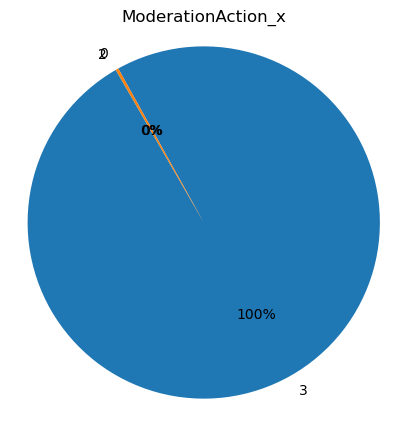

In [65]:
plotPie(df_gs,'ModerationAction_x')

In [66]:
# Group the DataFrame by 'Sender' column and get the total count
senderCount_gs = df_gs.groupby('Sender').agg(Total_Count=('Sender', 'size'),ModerationOkay=('ModerationAction_x', lambda x: (x == 3).sum()))

senderCount_gs.sort_values(by='Total_Count', ascending = False)

Total_Count  ModerationOkay
Sender                                                  
mark.senior20@hotmail.co.uk          138             138
shaun.elliott133@gmail.com           122             122
skiptonray@gmail.com                  92              92
info@shootingsupplies.info            78              78
marzella@mac.com                      71              71
...                                  ...             ...
hillbillyg98@gmail.com                 1               1
hibiscuscottage30@gmail.com            1               1
hhhxxxxxj@gmail.com                    1               1
herrflegelein@gmail.com                1               1
zk3405812@gmail.com                    1               1

[2392 rows x 2 columns]

In [67]:
# Group the DataFrame by 'Receiver' column and get the total count
senderCount_gs = df_gs.groupby('Recipient').agg(Total_Count=('Recipient', 'size'),ModerationOkay=('ModerationAction_x', lambda x: (x == 3).sum()))

senderCount_gs.sort_values(by='Total_Count', ascending = False)

Total_Count  ModerationOkay
Recipient                                               
cpgdesign@aol.com                    112             111
mark.senior20@hotmail.co.uk          106             106
info@shootingsupplies.info           106             105
shaun.elliott133@gmail.com            94              94
total-recoil@hotmail.co.uk            83              83
...                                  ...             ...
jackkennefick194@gmail.com             1               1
jackhenderson2016@aol.co.uk            1               1
jackchetwyn2005@gmail.com              1               1
jack_davey_88@yahoo.co.uk              1               1
zk3405812@gmail.com                    1               1

[2134 rows x 2 columns]

In [68]:
df_gs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9391 entries, 10 to 61620
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ModerationAction_x            9391 non-null   int64         
 1   ModerationDate_x              9391 non-null   datetime64[ns]
 2   GateKeeperModerationAction_x  9391 non-null   int64         
 3   MatchedCriteria               9391 non-null   object        
 4   Description                   9391 non-null   object        
 5   Occurrences                   383 non-null    float64       
 6   ModuleType                    383 non-null    float64       
 7   Sender                        9391 non-null   object        
 8   Recipient                     9391 non-null   object        
 9   Subject                       9391 non-null   object        
 10  Body                          9374 non-null   object        
 11  MostRecentMessage             937

In [69]:
country_dfGroup = df_gs.groupby('Country').agg(Total_Count=('Country', 'size'), EmailNotAccepted=('ModerationAction_x', lambda x: (x != 3).sum()))
country_dfGroup.sort_values(by = 'Total_Count', ascending=False)

Total_Count  EmailNotAccepted
Country                                            
No Country                   4460                10
UNITED KINGDOM               3368                 8
United Kingdom               1442                 0
United States                  22                 0
Spain                          20                 0
Togo                           16                 0
Ireland                         8                 0
Germany                         6                 6
Australia                       6                 0
Pakistan                        5                 0
Netherlands                     5                 0
Belgium                         3                 0
Japan                           2                 0
Turkey                          2                 0
Afghanistan                     2                 0
Israel                          2                 0
India                           2                 0
Canada                          2                 0
Italy                           2                 0
Lithuania                       1                 0
Switzerland                     1                 0
Bulgaria                        1                 0
United Arab Emirates            1                 0
Cyprus                          1                 0
France                          1                 0
Tanzania                        1                 0
Greece                          1                 0
Sweden                          1                 0
South Africa                    1                 1
Slovenia                        1                 0
Serbia                          1                 0
Romania                         1                 0
Poland                          1                 0
Isle of Man                     1                 0
New Zealand                     1                 0

In [70]:
df_gs['Moderated'].value_counts()

Moderated
0    9008
1     383
Name: count, dtype: int64

#### Percent of users receiving the most number of messages
7.88%

In [71]:
# Group the DataFrame by 'Recipient' and count the total number of messages received
total_messages_received = df_gs.groupby('Recipient')['Body'].count().reset_index(name='Total_Messages_Received')

# Count the number of 'Moderated' = 1 messages with respect to each 'Recipient'
moderated_messages_count = df_gs[df_gs['Moderated'] == 1].groupby('Recipient')['Moderated'].count().reset_index(name='Moderated_Messages_Count')

# Merge the two DataFrames to get the final result
result_df = pd.merge(total_messages_received, moderated_messages_count, on='Recipient', how='left').fillna(0)

In [72]:
result_df.sort_values(by='Total_Messages_Received',ascending=False)

Recipient  Total_Messages_Received  \
543             cpgdesign@aol.com                      112   
1365  mark.senior20@hotmail.co.uk                      106   
999    info@shootingsupplies.info                      106   
1839   shaun.elliott133@gmail.com                       94   
2015   total-recoil@hotmail.co.uk                       83   
...                           ...                      ...   
1026   jackkennefick194@gmail.com                        1   
1024  jackhenderson2016@aol.co.uk                        1   
1023    jackchetwyn2005@gmail.com                        1   
1022    jack_davey_88@yahoo.co.uk                        1   
2133          zk3405812@gmail.com                        1   

      Moderated_Messages_Count  
543                        3.0  
1365                       4.0  
999                        2.0  
1839                       5.0  
2015                       6.0  
...                        ...  
1026                       0.0  
1024                       0.0  
1023                       0.0  
1022                       0.0  
2133                       0.0  

[2134 rows x 3 columns]

In [73]:
result_df.describe().T

count      mean       std  min  25%  50%  75%  \
Total_Messages_Received   2134.0  4.392690  8.006412  1.0  1.0  2.0  5.0   
Moderated_Messages_Count  2134.0  0.179475  1.000296  0.0  0.0  0.0  0.0   

                            max  
Total_Messages_Received   112.0  
Moderated_Messages_Count   31.0

In [74]:
result_df[result_df['Total_Messages_Received'] >= 10]['Total_Messages_Received'].count()

216

In [75]:
((result_df[result_df['Total_Messages_Received'] >= 10]['Total_Messages_Received'].count())/len(result_df))*100

10.121836925960636

#### Phone Number message percent

18.22%

In [76]:
# Group the DataFrame by 'Sender' and 'Recipient', and sort the messages within each conversation by 'DateSent'
grouped_df = df_gs.groupby(['Sender', 'Recipient']).apply(lambda x: x.sort_values(by='DateSent')).reset_index(drop=True)
email_df = grouped_df[['Sender','Recipient','Body','DateSent']]

In [77]:
email_df

Sender                     Recipient  \
0      00-gangly.crises@icloud.com          stumanny@outlook.com   
1     06catalpa-drawing@icloud.com          tom.bugler@gmail.com   
2             10higginsc@gmail.com          okegun@hotmail.co.uk   
3            123abcsam97@gmail.com   p.eardley666@btinternet.com   
4         123greenjacket@gmail.com           andy.amc@icloud.com   
...                            ...                           ...   
9386           zgtully95@gmail.com       mansonfitness@gmail.com   
9387           zgtully95@gmail.com   thomasbrockbank@yahoo.co.uk   
9388           zgtully95@gmail.com   thomasbrockbank@yahoo.co.uk   
9389           zgtully95@gmail.com   thomasbrockbank@yahoo.co.uk   
9390           zk3405812@gmail.com  sales@shootingandscuba.co.uk   

                                                   Body            DateSent  
0                  Hi\n\nIs the air gun still for sale? 2023-08-15 22:12:39  
1     <div></div><div>&lt;html style="color: #171511... 2023-07-31 13:16:22  
2     Hi there, I'd give £150 for it if you can test... 2023-08-21 14:33:26  
3     Hello\n\nI am interested in your ad. Is it sti... 2023-08-08 21:12:53  
4     Hi. Would you sell without the scope and moder... 2023-07-29 10:23:01  
...                                                 ...                 ...  
9386  I don't feel comfortable posting a rifle sorry... 2023-08-07 12:02:12  
9387  Hi, yes still available, I'm in dereham\r\n\r\... 2023-08-08 04:13:50  
9388  Unfortunately I'm.on holiday currently, you're... 2023-08-08 10:30:01  
9389  Perfect yes I'll text you closer to the Time,\... 2023-08-08 14:48:48  
9390               Hi\n\nIs the air gun still for sale? 2023-07-28 21:30:27  

[9391 rows x 4 columns]

In [78]:
# Apply the function to each group in 'grouped_df' and create a new column 'Phone_Number_Messages_Count'
phone_number_count = 0
for body in email_df['Body'].astype(str):
    if re.search(r'\d{10}', body):
        phone_number_count += 1
phone_number_count

1729

In [79]:
ph_no_MsgPercent = (phone_number_count/len(email_df))*100
ph_no_MsgPercent

18.411244808859546

### <div class='alert alert-warning'> Why does GS have more emails than FAD? </div>

In [80]:
df_gs.head()

ModerationAction_x    ModerationDate_x  GateKeeperModerationAction_x  \
10                    3 2023-07-19 06:16:55                             5   
24                    3 2023-07-19 06:21:13                             5   
80                    3 2023-07-19 06:28:35                             5   
133                   3 2023-07-19 06:38:50                             5   
140                   3 2023-07-19 06:49:41                             5   

    MatchedCriteria     Description  Occurrences  ModuleType  \
10      No Criteria  No Description          NaN         NaN   
24      No Criteria  No Description          NaN         NaN   
80      No Criteria  No Description          NaN         NaN   
133     No Criteria  No Description          NaN         NaN   
140     No Criteria  No Description          NaN         NaN   

                          Sender                   Recipient  \
10   daveyboy_1969@hotmail.co.uk    mcintoshandy53@gmail.com   
24          olie27@hotmail.co.uk         hbul07109@gmail.com   
80       borojohn1964@live.co.uk       bullysean@hotmail.com   
133   assettofanatec@outlook.com   tomjessejames@yahoo.co.uk   
140      jordaaan2@hotmail.co.uk  markhaskett@btinternet.com   

                                               Subject  ...  \
10   Re: gunstar.co.uk - Message regarding ad: BSA ...  ...   
24                               New Message from site  ...   
80              Re: gunstar.co.uk - you have a message  ...   
133                              New Message from site  ...   
140                              New Message from site  ...   

               DateSent EmailStatus         Country  OriginatingSiteId  \
10  2023-07-19 06:01:49           3      No Country                 34   
24  2023-07-19 06:06:12           3  United Kingdom                 34   
80  2023-07-19 06:28:34           3      No Country                 34   
133 2023-07-19 06:38:49           3  United Kingdom                 34   
140 2023-07-19 06:49:40           3  United Kingdom                 34   

       ThreadId  LanguageCode SpfValidationResult SourceType       SiteName  \
10       732272            en                   1          1  gunstar.co.uk   
24   PM_1215563            en                   0          0  gunstar.co.uk   
80   PM_1215317            en                   1          1  gunstar.co.uk   
133  PM_1215572            en                   0          0  gunstar.co.uk   
140  PM_1215575            en                   0          0  gunstar.co.uk   

     Moderated  
10           0  
24           0  
80           0  
133          0  
140          0  

[5 rows x 22 columns]

In [81]:
df_gsOk = df_gs[df_gs['ModerationAction_x']==3]

In [82]:
df_gsOk.shape

(9366, 22)

In [83]:
df_gsOk.ModuleType.value_counts()

ModuleType
8.0     179
1.0      93
3.0      68
16.0     18
Name: count, dtype: int64

Frequency <br>
EmailAddress <br>
KeyPhrase <br>
EmailMailbox

In [84]:
df_gsOk.to_excel('gs_okay.xlsx')

## WightBay

In [85]:
df_wb = df[df['SiteName']=='wightbay.com']
df_wb.shape

(25600, 22)

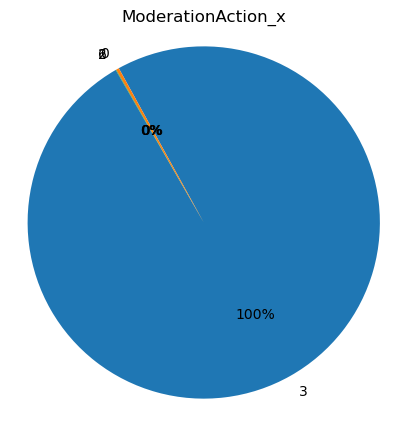

In [86]:
plotPie(df_wb,'ModerationAction_x')

In [87]:
df_wb['ModerationAction_x'].value_counts()

ModerationAction_x
3    25518
0       69
2       12
6        1
Name: count, dtype: int64

In [88]:
df_wb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25600 entries, 22 to 61619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ModerationAction_x            25600 non-null  int64         
 1   ModerationDate_x              25600 non-null  datetime64[ns]
 2   GateKeeperModerationAction_x  25600 non-null  int64         
 3   MatchedCriteria               25600 non-null  object        
 4   Description                   25600 non-null  object        
 5   Occurrences                   1531 non-null   float64       
 6   ModuleType                    1531 non-null   float64       
 7   Sender                        25600 non-null  object        
 8   Recipient                     25600 non-null  object        
 9   Subject                       25600 non-null  object        
 10  Body                          25600 non-null  object        
 11  MostRecentMessage             25

In [89]:
df_wb['Moderated'].value_counts()

Moderated
0    24069
1     1531
Name: count, dtype: int64

In [90]:
df_wb['ModuleType'].value_counts()

ModuleType
4.0     724
8.0     526
3.0     184
16.0     50
1.0      35
13.0      5
7.0       4
2.0       3
Name: count, dtype: int64

In [91]:
df_wb.shape

(25600, 22)

##### Average messages in a conversation
3.6

In [92]:
# Concatenate 'Sender' and 'Recipient' columns to identify the conversation between users
df_wb['Conversation'] = df_wb[['Sender', 'Recipient']].apply(lambda x: tuple(sorted(x)), axis=1)

# Group the DataFrame by 'Conversation' and get the total count of messages in each conversation
conversation_counts = df_wb['Conversation'].value_counts()

In [93]:
conversation_counts

Conversation
(nathaniel@dr.com, smokyjoe80@googlemail.com)              58
(andygraham7474@gmail.com, jessethetrex@gmail.com)         53
(Mikewightbay1962@outlook.com, mst2018gm@gmail.com)        50
(francesstewart@live.co.uk, nadinerolfdean@outlook.com)    49
(jk9755358@gmail.com, meminb08@gmail.com)                  40
                                                           ..
(bardoug@googlemail.com, walked129@gmail.com)               1
(karacrick02@gmail.com, warrensean119@gmail.com)            1
(danieljtasker@gmail.com, hammie-iow@hotmail.co.uk)         1
(dave@fishbournegarage.com, jobassett17@gmail.com)          1
(stephenwathen65@gmail.com, trcor@outlook.com)              1
Name: count, Length: 6892, dtype: int64

In [94]:
df_wb['Conversation'].value_counts().sum()

25600

In [95]:
conversation_counts.size

6892

In [96]:
print('The avg messages in a conversation is : ', (df_wb['Conversation'].value_counts().sum())/conversation_counts.size)

The avg messages in a conversation is :  3.7144515380150898


##### Unique ThreadId Check

In [97]:
df_wb.columns

Index(['ModerationAction_x', 'ModerationDate_x',
       'GateKeeperModerationAction_x', 'MatchedCriteria', 'Description',
       'Occurrences', 'ModuleType', 'Sender', 'Recipient', 'Subject', 'Body',
       'MostRecentMessage', 'DateSent', 'EmailStatus', 'Country',
       'OriginatingSiteId', 'ThreadId', 'LanguageCode', 'SpfValidationResult',
       'SourceType', 'SiteName', 'Moderated', 'Conversation'],
      dtype='object')

In [98]:
# Group the DataFrame by 'Conversation' and 'ThreadId', then get the total count of messages in each conversation
grouped_df = df_wb.groupby(['Conversation', 'ThreadId']).size().reset_index(name='Total_Messages')

# Group the DataFrame again by 'Conversation' to get the list of associated 'ThreadId's
grouped_df['ThreadIds'] = grouped_df.groupby('Conversation')['ThreadId'].transform(list)

# Create a new DataFrame to get the total count of messages in each conversation and whether it has a single ThreadId or not
result_df = grouped_df.groupby('Conversation').agg(Total_Messages=('Total_Messages', 'sum'),
                                                   ThreadIds=('ThreadIds', 'first'),
                                                   Single_ThreadId=('ThreadIds', lambda x: len(set(x)) == 1))

In [99]:
result_df

Total_Messages ThreadIds  \
Conversation                                                                   
(0310pvincent@gmail.com, christina291101@gmail....               2   4106590   
(0310pvincent@gmail.com, davidyunir14792@gmail....               2   4106584   
(0310pvincent@gmail.com, rubbishemail@sky.com)                   7   4154731   
(0x.sadie.hutch.x0@gmail.com, jonathan_west1@sk...               2   4142335   
(10jrbaker@gmail.com, myheartisyours1@hotmail.com)               1   4111834   
...                                                            ...       ...   
(wazzzer@hotmail.co.uk, wendysmeryk@gmail.com)                  11   4147399   
(wendy@hayeshome.co.uk, whackeyracers@hotmail.c...               6   4168600   
(whitetigeruk2006@hotmail.co.uk, yateslorraine4...               5   4147285   
(william@the-freshwaters.uk, xXchloe_bakerXx@ho...               2   4100848   
(woods005@btinternet.com, ywisthebest@hotmail.c...               1   4116625   

                                                    Single_ThreadId  
Conversation                                                         
(0310pvincent@gmail.com, christina291101@gmail....             True  
(0310pvincent@gmail.com, davidyunir14792@gmail....             True  
(0310pvincent@gmail.com, rubbishemail@sky.com)                 True  
(0x.sadie.hutch.x0@gmail.com, jonathan_west1@sk...             True  
(10jrbaker@gmail.com, myheartisyours1@hotmail.com)             True  
...                                                             ...  
(wazzzer@hotmail.co.uk, wendysmeryk@gmail.com)                 True  
(wendy@hayeshome.co.uk, whackeyracers@hotmail.c...            False  
(whitetigeruk2006@hotmail.co.uk, yateslorraine4...             True  
(william@the-freshwaters.uk, xXchloe_bakerXx@ho...             True  
(woods005@btinternet.com, ywisthebest@hotmail.c...             True  

[6892 rows x 3 columns]

In [100]:
result_df['Single_ThreadId'].value_counts()

Single_ThreadId
True     6574
False     318
Name: count, dtype: int64

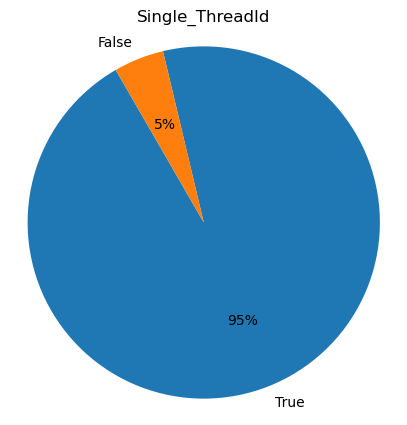

In [101]:
plotPie(result_df,'Single_ThreadId')

<p style = "font-weight:Bold"> Thread ID is not unique to conversations between two users.</p> <br>

### Moderation Action

In [102]:
df['ModerationAction_x'].value_counts()

ModerationAction_x
3    57146
0     4097
6      272
2      108
Name: count, dtype: int64

SilentlyReject = 0 <br>
SendToManualModeration = 2 <br>
ModeratedOkay = 3 <br>
SkipModeration = 4 <br>
NoAction = 5 <br>
ScamRejected = 6 <br>
CouldNotReinstateRecipient = 7

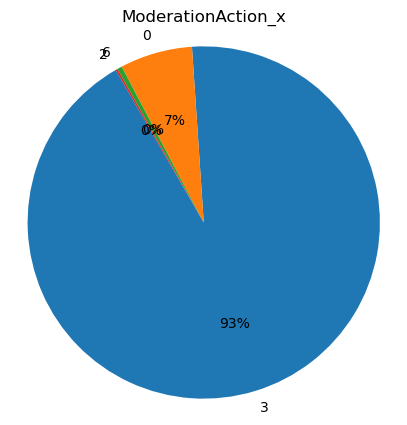

In [103]:
plotPie(df,'ModerationAction_x')

92% of the emails were ModeratedOkay, whereas 6% was SilentlyRejected, 1% is ScamRejected and less than 1% was SendToManualModeration.

In [104]:
# Creating a new DF with only Rejected emails

rejectMails = df[(df['ModerationAction_x'] == 0) | (df['ModerationAction_x'] == 6)]
rejectMails.shape

(4369, 22)

In [105]:
rejectMails['SiteName'].value_counts()

SiteName
caravansforsale.co.uk    768
marinepromoter.com       739
gunpromoter.co.uk        604
equinepromoter.com       551
equinepromoter.co.uk     532
friday-ad.co.uk          434
horsemart.co.uk          347
horseclicks.com          214
wightbay.com              70
birdtrader.co.uk          48
dogsandpuppies.co.uk      28
gunstar.co.uk             24
ventadecaballos.es         4
promoterlocal.co.uk        4
dummy-site.co.uk           1
kittenads.co.uk            1
Name: count, dtype: int64

In [106]:
df['SiteName'].value_counts()

SiteName
wightbay.com             25600
gunstar.co.uk             9391
friday-ad.co.uk           9079
horsemart.co.uk           5907
caravansforsale.co.uk     3554
horseclicks.com           1948
birdtrader.co.uk          1765
marinepromoter.com         919
equinepromoter.com         825
gunpromoter.co.uk          825
ventadecaballos.es         655
equinepromoter.co.uk       567
farmingads.co.uk           342
kittenads.co.uk            124
dogsandpuppies.co.uk       108
promoterlocal.co.uk         12
dummy-site.co.uk             2
Name: count, dtype: int64

In [107]:
rejectMails.head(3)

ModerationAction_x    ModerationDate_x  GateKeeperModerationAction_x  \
0                   6 2023-07-19 06:31:26                             5   
1                   6 2023-07-19 06:31:28                             5   
2                   6 2023-07-19 06:31:29                             5   

  MatchedCriteria          Description  Occurrences  ModuleType  \
0           gmail  for catching emails          1.0         3.0   
1           gmail  for catching emails          1.0         3.0   
2           gmail  for catching emails          1.0         3.0   

                Sender                  Recipient  \
0  deji90673@gmail.com      heidswood@hotmail.com   
1  deji90673@gmail.com      promedia333@gmail.com   
2  deji90673@gmail.com  hawkinsleslie69@yahoo.com   

                                             Subject  ...            DateSent  \
0  Message regarding ad: Extremely reliable car. ...  ... 2023-07-19 06:05:18   
1         Message regarding ad: 2005 SUBARU FORESTER  ... 2023-07-19 06:05:31   
2  Message regarding ad: Recently fully serviced ...  ... 2023-07-19 06:05:51   

  EmailStatus         Country  OriginatingSiteId ThreadId  LanguageCode  \
0          11  United Kingdom                  1  5075644            en   
1          11  United Kingdom                  1  5075647            en   
2          11  United Kingdom                  1  5075650            en   

  SpfValidationResult SourceType         SiteName  Moderated  
0                   0          0  friday-ad.co.uk          1  
1                   0          0  friday-ad.co.uk          1  
2                   0          0  friday-ad.co.uk          1  

[3 rows x 22 columns]

### Email Status

In [108]:
df['EmailStatus'].value_counts()

EmailStatus
3     57140
5      4097
11      272
2       107
13        7
Name: count, dtype: int64

AwaitingModeration = 1 <br>
InManualModeration = 2 <br>
Accepted = 3 <br>
Delivered = 4 <br>
SilentlyRejected = 5 <br>
CouldNotReinstateRecipient = 6 <br>
AcceptedWithRedaction = 7 <br>
SkippedModeration = 8 <br>
LockedForModeration = 9 <br>
ErrorDuringModeration = 10 <br>
ScamRejected = 11 <br>
TentativelyAccepted = 12 <br>
HeldByGateKeeper = 13 <br>
BackUpRetry = 14

In [109]:
df.head()

ModerationAction_x    ModerationDate_x  GateKeeperModerationAction_x  \
0                   6 2023-07-19 06:31:26                             5   
1                   6 2023-07-19 06:31:28                             5   
2                   6 2023-07-19 06:31:29                             5   
3                   3 2023-07-19 06:06:18                             5   
4                   3 2023-07-19 06:07:10                             5   

  MatchedCriteria          Description  Occurrences  ModuleType  \
0           gmail  for catching emails          1.0         3.0   
1           gmail  for catching emails          1.0         3.0   
2           gmail  for catching emails          1.0         3.0   
3     No Criteria       No Description          NaN         NaN   
4     No Criteria       No Description          NaN         NaN   

                       Sender                          Recipient  \
0         deji90673@gmail.com              heidswood@hotmail.com   
1         deji90673@gmail.com              promedia333@gmail.com   
2         deji90673@gmail.com          hawkinsleslie69@yahoo.com   
3                me@enuuu.com  marta.markow@fridaymediagroup.com   
4  rebecca0607evans@gmail.com            herby432001@yahoo.co.uk   

                                             Subject  ...            DateSent  \
0  Message regarding ad: Extremely reliable car. ...  ... 2023-07-19 06:05:18   
1         Message regarding ad: 2005 SUBARU FORESTER  ... 2023-07-19 06:05:31   
2  Message regarding ad: Recently fully serviced ...  ... 2023-07-19 06:05:51   
3                              New Message from site  ... 2023-07-19 06:01:06   
4  Message regarding ad: Home help needed by reti...  ... 2023-07-19 06:02:07   

  EmailStatus         Country  OriginatingSiteId    ThreadId  LanguageCode  \
0          11  United Kingdom                  1     5075644            en   
1          11  United Kingdom                  1     5075647            en   
2          11  United Kingdom                  1     5075650            en   
3           3  UNITED KINGDOM                  1  PM_5515048            en   
4           3  UNITED KINGDOM                  1     5075638            en   

  SpfValidationResult SourceType         SiteName  Moderated  
0                   0          0  friday-ad.co.uk          1  
1                   0          0  friday-ad.co.uk          1  
2                   0          0  friday-ad.co.uk          1  
3                   0          0  friday-ad.co.uk          0  
4                   0          0  friday-ad.co.uk          0  

[5 rows x 22 columns]

#### ModuleType

None = 0 <br>
EmailAddressModule = 1 <br>
IPAddressModule = 2 <br>
KeyphraseModule = 3 <br>
RedactedKeyphraseModule = 4 <br>
DayOfWeekModule = 5 <br>
BetweenDayOfWeekModule = 6 <br>
CountryModule = 7 <br>
FrequencyModule = 8 <br>
FuzzyMatchModule = 9 <br>
CategoryModule = 10 <br>
SiteModule = 11 <br>
SenderProbationModule = 12 <br>
EmailDomainModule = 13 <br>
AttachmentTypeModule = 14 <br>
AttachmentModule = 15 <br>
EmailMailboxDotCountModule = 16 <br>
EmailSourceModule = 17

In [110]:
df['ModuleType'].value_counts()

ModuleType
3.0     3983
8.0     1914
11.0    1740
4.0     1711
1.0      968
12.0     567
7.0      421
2.0      339
16.0      79
13.0      48
Name: count, dtype: int64

### Country

In [111]:
country_dfGroup = df.groupby('Country').agg(Total_Count=('Country', 'size'), EmailAccepted=('ModerationAction_x', lambda x: (x == 3).sum()))

In [112]:
country_dfGroup.sort_values(by = 'EmailAccepted', ascending=False).head(30)

Total_Count  EmailAccepted
Country                                        
UNITED KINGDOM             20761          20481
United Kingdom             20041          19560
No Country                 15927          14533
United States               1438           1230
Spain                        687            674
Ireland                      100             75
Canada                        96             54
France                       112             53
Netherlands                  399             45
Israel                        43             43
Hong Kong SAR China           35             34
Togo                          26             26
Greece                        24             24
Italy                         30             23
Portugal                      26             23
Belgium                       39             17
Turkey                        18             15
India                         19             14
Pakistan                      13             12
Sweden                        29             11
Kuwait                        11             11
Australia                     13             11
Guernsey                      10             10
Saudi Arabia                  10             10
Indonesia                     10             10
Japan                         10              9
Poland                        20              9
Denmark                       30              8
Switzerland                    7              7
Germany                      116              6

In [113]:
country_dfGroup = df.groupby('Country').agg(Total_Count=('Country', 'size'), EmailNotAccepted=('ModerationAction_x', lambda x: (x != 3).sum()))
country_dfGroup.sort_values(by = 'EmailNotAccepted', ascending=False).head()

Total_Count  EmailNotAccepted
Country                                      
No Country            15927              1394
Russia                 1088              1088
United Kingdom        20041               481
Netherlands             399               354
UNITED KINGDOM        20761               280

##### Correlation Heatmap

In [114]:
# Checking for multi-collinearity
correlation = df.corr()

sns.heatmap(correlation, cmap='Blues', annot=True, annot_kws={'fontsize': 10})

ValueError: could not convert string to float: 'gmail'

# Rough Analysis - Not Relevant

In [115]:
random = df[df['Sender']=='eericpask@gmail.com']

In [116]:
random['MostRecentMessage']

815                    Do you still have this wheelchair?
817       hey Richard, Do you still have this wheelchair?
818                 Hi Do you still have this wheelchair?
820                   Julian I want to buy the wheelchair
821                               TIna you still have it?
                              ...                        
7640     I am asking if I can setup a man with van to ...
7641        i need your p ay p al e,mail &pick up address
7643                    would you be willing to setup one
7644    thank you i message you to that email you sent...
7646    thank you i message you to that ema il you sen...
Name: MostRecentMessage, Length: 181, dtype: object

# <div class = 'alert alert-info'>NLP - Topic Modelling - Unsupervised ML</div>

In [117]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [118]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [119]:
# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import GridSearchCV

# Importing Counter
from collections import Counter

# import ast(abstract syntax tree)
import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing TSNE for data exploration and visualizing high-dimensional data
from sklearn.manifold import TSNE

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word
from nltk.corpus import stopwords
import re

# importing countVectorizer for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61623 entries, 0 to 61622
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ModerationAction_x            61623 non-null  int64         
 1   ModerationDate_x              61623 non-null  datetime64[ns]
 2   GateKeeperModerationAction_x  61623 non-null  int64         
 3   MatchedCriteria               61623 non-null  object        
 4   Description                   61623 non-null  object        
 5   Occurrences                   11770 non-null  float64       
 6   ModuleType                    11770 non-null  float64       
 7   Sender                        61623 non-null  object        
 8   Recipient                     61623 non-null  object        
 9   Subject                       61623 non-null  object        
 10  Body                          61567 non-null  object        
 11  MostRecentMessage           

In [121]:
df_topics = df[['ThreadId','Description','Subject','Body','SiteName']]

In [122]:
df_topics.head()

ThreadId          Description  \
0     5075644  for catching emails   
1     5075647  for catching emails   
2     5075650  for catching emails   
3  PM_5515048       No Description   
4     5075638       No Description   

                                             Subject  \
0  Message regarding ad: Extremely reliable car. ...   
1         Message regarding ad: 2005 SUBARU FORESTER   
2  Message regarding ad: Recently fully serviced ...   
3                              New Message from site   
4  Message regarding ad: Home help needed by reti...   

                                                Body         SiteName  
0  Hi,\nDo you still have this available for sale...  friday-ad.co.uk  
1  Hi,\nDo you still have this available for sale...  friday-ad.co.uk  
2  Hi,\nDo you still have this available for sale...  friday-ad.co.uk  
3                        Response when API is online  friday-ad.co.uk  
4  Hi there I am looking for part time work and y...  friday-ad.co.uk

In [123]:
df_topics['SiteName'].value_counts()

SiteName
wightbay.com             25600
gunstar.co.uk             9391
friday-ad.co.uk           9079
horsemart.co.uk           5907
caravansforsale.co.uk     3554
horseclicks.com           1948
birdtrader.co.uk          1765
marinepromoter.com         919
equinepromoter.com         825
gunpromoter.co.uk          825
ventadecaballos.es         655
equinepromoter.co.uk       567
farmingads.co.uk           342
kittenads.co.uk            124
dogsandpuppies.co.uk       108
promoterlocal.co.uk         12
dummy-site.co.uk             2
Name: count, dtype: int64

In [124]:
df_topics.isnull().sum()

ThreadId        0
Description     0
Subject         0
Body           56
SiteName        0
dtype: int64

In [125]:
df_topics.dropna(axis=0, how='any', inplace=True)

In [126]:
df_topics.isnull().sum()

ThreadId       0
Description    0
Subject        0
Body           0
SiteName       0
dtype: int64

In [127]:
# removing punctuations
lm = WordNetLemmatizer()

In [128]:
def rem_unwanted(article):
    modify = re.sub("[^a-zA-Z]",' ',article) #Keeping only alphabets in our corpus
    modify = modify.lower()                  #Coonverting into lower case
    return modify

In [129]:
df_topics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61567 entries, 0 to 61622
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ThreadId     61567 non-null  object
 1   Description  61567 non-null  object
 2   Subject      61567 non-null  object
 3   Body         61567 non-null  object
 4   SiteName     61567 non-null  object
dtypes: object(5)
memory usage: 2.8+ MB


In [130]:
df_topics['Body'] = df_topics['Body'].apply(rem_unwanted)

In [131]:
# Remove '\r' and '\n' from the 'Body' column
df_topics['Body'] = df_topics['Body'].str.replace('\r', '').str.replace('\n', '').str.replace('com', '').str.replace('https', '').str.replace('email', '').str.replace('utm_campaign', '').str.replace('utm_medium', '').str.replace('utm_source', '').str.replace('websiteemail', '').str.replace('www', '').str.replace('auto_you_have_an_enquiry_reply_seller', '').str.replace('wightbay', '').str.replace('gunstar', '').str.replace('friday-ad', '').str.replace('horsemart', '').str.replace('.co.uk', '').str.replace('caravansforsale', '').str.replace('horseclicks', '').str.replace('birdtrader', '').str.replace('marinepromoter', '').str.replace('equinepromoter', '').str.replace('gunpromoter', '').str.replace('ventadecaballos', '').str.replace('.es', '').str.replace('equinepromoter', '').str.replace('farmingads', '').str.replace('kittenads', '').str.replace('dogsandpuppies', '').str.replace('promoterlocal', '').str.replace('dummy-site', '').str.replace('auto_you_have_a_reply_buyer', '').str.replace('_blank', '').str.replace('wightbay', '')

In [132]:
df_topics.head()

ThreadId          Description  \
0     5075644  for catching emails   
1     5075647  for catching emails   
2     5075650  for catching emails   
3  PM_5515048       No Description   
4     5075638       No Description   

                                             Subject  \
0  Message regarding ad: Extremely reliable car. ...   
1         Message regarding ad: 2005 SUBARU FORESTER   
2  Message regarding ad: Recently fully serviced ...   
3                              New Message from site   
4  Message regarding ad: Home help needed by reti...   

                                                Body         SiteName  
0  hi  do you still have this available for sale ...  friday-ad.co.uk  
1  hi  do you still have this available for sale ...  friday-ad.co.uk  
2  hi  do you still have this available for sale ...  friday-ad.co.uk  
3                        response when api is online  friday-ad.co.uk  
4  hi there i am looking for part time work and y...  friday-ad.co.uk

In [133]:
df_topics['BodyLength'] = df_topics.Body.str.len()

In [134]:
df_topics.head()

ThreadId          Description  \
0     5075644  for catching emails   
1     5075647  for catching emails   
2     5075650  for catching emails   
3  PM_5515048       No Description   
4     5075638       No Description   

                                             Subject  \
0  Message regarding ad: Extremely reliable car. ...   
1         Message regarding ad: 2005 SUBARU FORESTER   
2  Message regarding ad: Recently fully serviced ...   
3                              New Message from site   
4  Message regarding ad: Home help needed by reti...   

                                                Body         SiteName  \
0  hi  do you still have this available for sale ...  friday-ad.co.uk   
1  hi  do you still have this available for sale ...  friday-ad.co.uk   
2  hi  do you still have this available for sale ...  friday-ad.co.uk   
3                        response when api is online  friday-ad.co.uk   
4  hi there i am looking for part time work and y...  friday-ad.co.uk   

   BodyLength  
0          91  
1          91  
2          91  
3          27  
4         306

In [135]:
# Create an empty dictionary to hold the separate dataframes
dfs_by_sitename = {}

# Loop through unique SiteName values and create separate dataframes
for sitename in df_topics['SiteName'].unique():
    dfs_by_sitename[sitename] = df_topics[df_topics['SiteName'] == sitename].copy()


 dfs_by_sitename['SiteA'] 

## <div class = 'alert alert-danger'>WightBay</div>

In [136]:
df_topics_wb = dfs_by_sitename['wightbay.com']

In [137]:
df_topics_wb.head()

ThreadId     Description                                      Subject  \
22   4079422  No Description                  Your Advert on Wightbay.com   
23   4094899  No Description  LE CREUSET. 5 piece  Saucepan set with lids   
33   4086409  No Description                  Your Advert on Wightbay.com   
41   4094905  No Description                  Your Advert on Wightbay.com   
114  4094734  No Description                  Your Advert on Wightbay.com   

                                                  Body      SiteName  \
22                           that s fine   po   dq      wightbay.com   
23   is the  a href             target   blank  le ...  wightbay.com   
33   hi ben   the pickup address is newclose farmho...  wightbay.com   
41   morning is this still available please   i cou...  wightbay.com   
114  hi  yes it s still available  what time on the...  wightbay.com   

     BodyLength  
22           25  
23          107  
33          139  
41           69  
114          55

In [138]:
df_topics_wb.shape

(25600, 6)

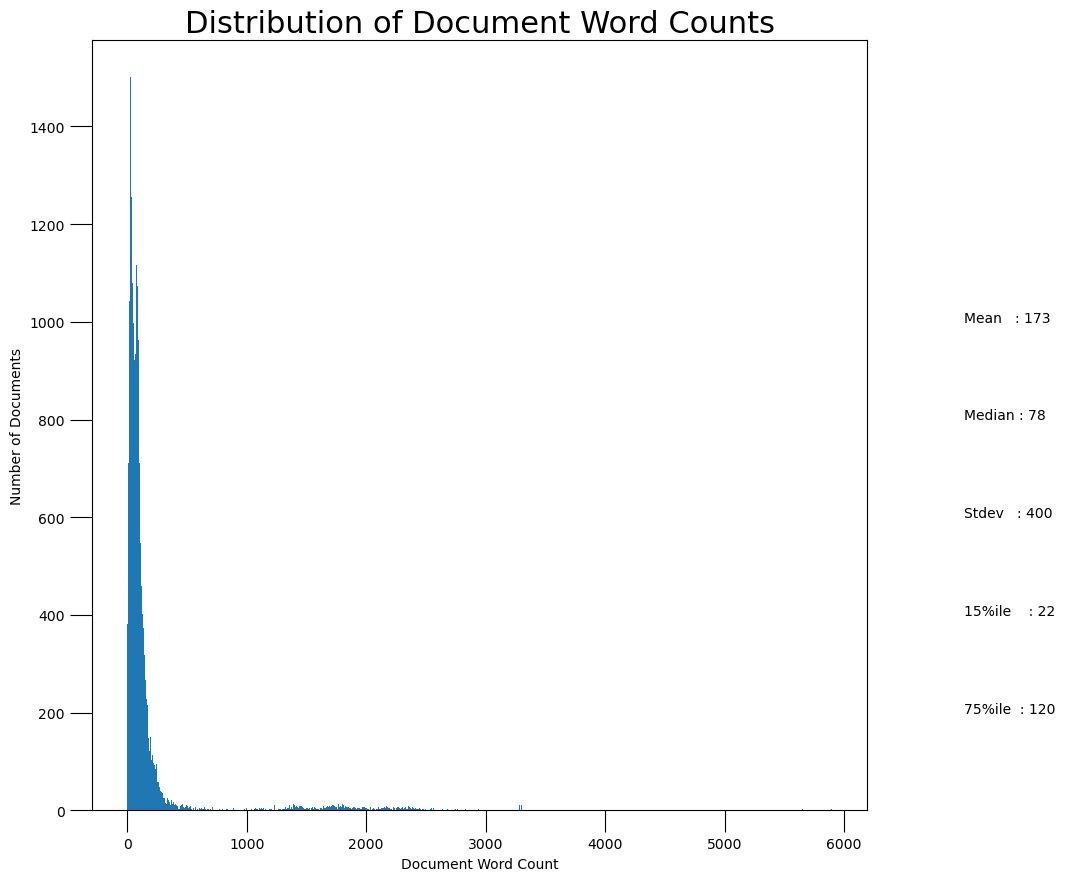

In [139]:
# distribution of Body-lengths

doc_lens = [d for d in df_topics_wb['BodyLength']]

# Plot
plt.figure(figsize=(10,10))
plt.hist(doc_lens, bins = 1000)
plt.text(7000, 1000, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(7000, 800, "Median : " + str(round(np.median(doc_lens))))
plt.text(7000, 600, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(7000, 400, "15%ile    : " + str(round(np.quantile(doc_lens, q=0.1))))
plt.text(7000, 200, "75%ile  : " + str(round(np.quantile(doc_lens, q=0.75))))

plt.gca().set(ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [140]:
df_topics_wb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25600 entries, 22 to 61619
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ThreadId     25600 non-null  object
 1   Description  25600 non-null  object
 2   Subject      25600 non-null  object
 3   Body         25600 non-null  object
 4   SiteName     25600 non-null  object
 5   BodyLength   25600 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [141]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [142]:
# dowloading nltk stopwords module
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajathadri_as\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [143]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')


print('Few of the stop words in english language NLTK library are:\n')
# Printing only a few stop words for demo
stpwrd[:10]

Few of the stop words in english language NLTK library are:



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [144]:
df_topics_wb.Body.head()

22                             that s fine   po   dq    
23     is the  a href             target   blank  le ...
33     hi ben   the pickup address is newclose farmho...
41     morning is this still available please   i cou...
114    hi  yes it s still available  what time on the...
Name: Body, dtype: object

In [145]:
df_topics_wb['Body'] = df_topics_wb['Body'].replace('\r','')
df_topics_wb['Body'] = df_topics_wb['Body'].replace('\n','')

In [146]:
df_topics_wb.Body.head()

22                             that s fine   po   dq    
23     is the  a href             target   blank  le ...
33     hi ben   the pickup address is newclose farmho...
41     morning is this still available please   i cou...
114    hi  yes it s still available  what time on the...
Name: Body, dtype: object

In [147]:
# Creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

In [148]:
counts = count_vectorizer.fit_transform(df_topics_wb['Body'])

In [149]:
# Converting the sparse matrix into a dataframe
counts_df =  pd.DataFrame(counts.toarray(), columns = count_vectorizer.get_feature_names_out())

In [150]:
counts_df.shape

(25600, 12356)

In [151]:
counts_df.head()

aa  aaaa  aaakbuvlx  aab  aaran  aaron  aaviary  ab  abbey  abbeyfield  \
0   0     0          0    0      0      0        0   0      0           0   
1   0     0          0    0      0      0        0   0      0           0   
2   0     0          0    0      0      0        0   0      0           0   
3   0     0          0    0      0      0        0   0      0           0   
4   0     0          0    0      0      0        0   0      0           0   

   ...  zpxxqbtv  zso  zsp  zulu  zupcaaj  zurg  zw  zylipikf  zzezb  zzr  
0  ...         0    0    0     0        0     0   0         0      0    0  
1  ...         0    0    0     0        0     0   0         0      0    0  
2  ...         0    0    0     0        0     0   0         0      0    0  
3  ...         0    0    0     0        0     0   0         0      0    0  
4  ...         0    0    0     0        0     0   0         0      0    0  

[5 rows x 12356 columns]

In [152]:
# Creating an empty dictionary
counts_dict = {}

# Store the words as key-value pairs
for ii, word in enumerate(counts_df.columns):
    counts_dict[word] = sum(counts_df[str(word)])
    word_count = [(i,count) for i,count in list(zip(counts_dict.keys(), counts_dict.values()))]

In [153]:
#most common words

sorted_counts = sorted(word_count, key = lambda x: x[1], reverse = True)
sorted_counts[:40]

[('utm', 17290),
 ('reply', 9071),
 ('still', 8303),
 ('hi', 8184),
 ('available', 7138),
 ('website', 5762),
 ('medium', 5760),
 ('auto', 5746),
 ('source', 5742),
 ('campaign', 5740),
 ('please', 5302),
 ('thanks', 4759),
 ('yes', 3837),
 ('enquiry', 3655),
 ('would', 3600),
 ('message', 3466),
 ('seller', 2772),
 ('account', 2457),
 ('help', 2420),
 ('thank', 2280),
 ('buyer', 2257),
 ('inbox', 2178),
 ('dashboard', 2147),
 ('know', 2112),
 ('ok', 2112),
 ('blank', 2102),
 ('href', 2102),
 ('target', 2102),
 ('sorry', 2039),
 ('tomorrow', 2032),
 ('could', 1950),
 ('img', 1808),
 ('west', 1806),
 ('eu', 1753),
 ('amazonaws', 1748),
 ('png', 1748),
 ('wbauto', 1748),
 ('let', 1713),
 ('yiv', 1688),
 ('collect', 1632)]

In [154]:
# Removing the most frequently used irrevelant words 
add_stopwords = ['utm','hi', 'available', 'still' ,'wightbay', 'website', 'please','thanks','reply','would','account','thank','inbox','href','ok','wbauto','eu','amazonaws','blank','img','png','yiv','regards']

In [155]:
#Function to remove additional stopwords 
def remove_add_stopwords(text):
  text = [wd.lower() for wd in text.split() if wd.lower() not in add_stopwords]
  return " ".join(text)

In [156]:
#Removing addtional stopwords according to use case
df_topics_wb['Body'] = df_topics_wb['Body'].apply(remove_add_stopwords)

Lemmatization

In [157]:
# downloading wordNet lemmatizer
nltk.download(['wordnet','omw-1.4'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajathadri_as\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rajathadri_as\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [158]:
lemmatizer = WordNetLemmatizer()

In [159]:
# Lemmatizing an article to see what wordnet returns
for rows in df_topics_wb['Body']:
 print(rows)
 print(len(rows))
 test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
 print(test)
 print(len(test))
 break

that s fine po dq
17
['that', 's', 'fine', 'po', 'dq']
5


### Feature Extraction

In [160]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stpwrd, max_features = 4000)

In [161]:
# Taking a sample Article
text_sample = df_topics_wb.Body

In [162]:
print('Content before vectorization:\n {}'.format(text_sample[22]))

Content before vectorization:
 that s fine po dq


In [163]:
# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

In [164]:
# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix))

Content after vectorization: 
  (0, 1206)	1
  (0, 2655)	1
  (1, 3440)	1
  (1, 1931)	1
  (1, 2610)	1
  (1, 3127)	1
  (2, 2655)	2
  (2, 327)	1
  (2, 2604)	1
  (2, 33)	2
  (2, 1158)	1
  (2, 1909)	1
  (2, 3977)	1
  (2, 984)	1
  (2, 669)	1
  (2, 620)	1
  (2, 2224)	1
  (3, 2273)	2
  (3, 755)	1
  (4, 3963)	1
  (4, 3530)	1
  (4, 3818)	1
  (5, 3440)	1
  (5, 296)	1
  (5, 975)	1
  :	:
  (25596, 687)	1
  (25596, 1862)	1
  (25596, 3634)	1
  (25597, 755)	1
  (25597, 2609)	1
  (25597, 3108)	1
  (25597, 1698)	1
  (25597, 1542)	1
  (25597, 3601)	1
  (25597, 3721)	1
  (25597, 1700)	1
  (25598, 3046)	1
  (25598, 1862)	1
  (25598, 3639)	1
  (25598, 1542)	1
  (25598, 357)	1
  (25598, 2009)	2
  (25598, 1697)	1
  (25598, 292)	1
  (25598, 416)	1
  (25598, 1385)	1
  (25598, 306)	1
  (25599, 3440)	1
  (25599, 3634)	1
  (25599, 2517)	1


### Model Implementation

In [340]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(document_term_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

In [341]:
for i,topic in enumerate(lda.components_):
    print(f'Topic #{i}:')
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0:
['ads', 'please', 'registered', 'ducklings', 'livestock', 'sale', 'question', 'medium', 'co', 'uk']


Topic #1:
['livestock', 'khaki', 'ads', 'farming', 'registered', 'medium', 'question', 'uk', 'co', 'amp']


Topic #2:
['ram', 'sale', 'farming', 'ads', 'lambs', 'question', 'medium', 'registered', 'uk', 'co']




In [342]:
topic_values = lda.transform(document_term_matrix)
doc_num, topic_num = topic_values.shape

In [343]:
data = pd.DataFrame({'document': df_topics_wb['Body'],'lda': topic_values.argmax(axis=1)})
data.groupby(['lda']).count().unstack()

          lda
document  0      121
          1       93
          2      128
dtype: int64

In [344]:
# Defining a function to plot WordCloud
def word_cloud_lda(index):
  imp_words_topic=""
  comp=lda.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400,max_font_size=100).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

In [345]:
# most important words for each topic
vocab = count_vectorizer.get_feature_names_out()

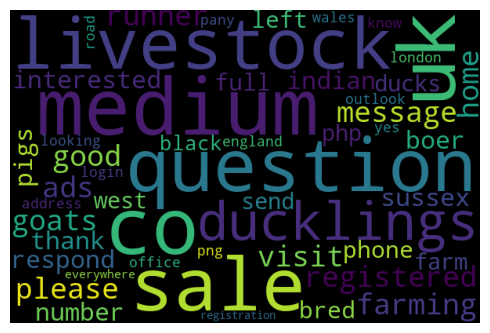

In [346]:
#Word Cloud for 0
word_cloud_lda(0)

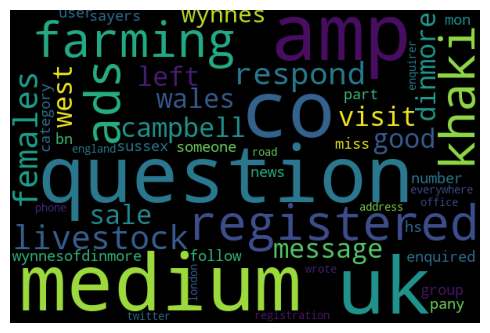

In [347]:
#Word Cloud
word_cloud_lda(1)

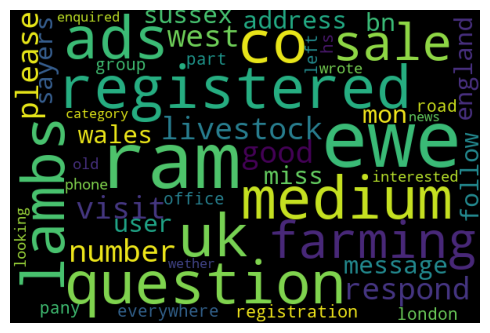

In [348]:
#Word Cloud
word_cloud_lda(2)

## <div class = 'alert alert-danger'>Gunstar</div>

In [349]:
df_topics_wb = dfs_by_sitename['gunstar.co.uk']

In [350]:
df_topics_wb.head()

ThreadId     Description  \
10       732272  No Description   
24   PM_1215563  No Description   
80   PM_1215317  No Description   
133  PM_1215572  No Description   
140  PM_1215575  No Description   

                                               Subject  \
10   Re: gunstar.co.uk - Message regarding ad: BSA ...   
24                               New Message from site   
80              Re: gunstar.co.uk - you have a message   
133                              New Message from site   
140                              New Message from site   

                                                  Body       SiteName  \
10   yes it s for sale from my iphone on jul at co ...  gunstar.co.uk   
24   it s sold pending pick up now if the sale fall...  gunstar.co.uk   
80   are you free tomorrow from my iphone on jul at...  gunstar.co.uk   
133                                        you re wele  gunstar.co.uk   
140                  yes it s and yes it can be posted  gunstar.co.uk   

     BodyLength  
10         2454  
24          100  
80         1336  
133          13  
140          52

In [351]:
df_topics_wb.shape

(9374, 6)

In [352]:
df_topics_wb.isnull().sum()

ThreadId       0
Description    0
Subject        0
Body           0
SiteName       0
BodyLength     0
dtype: int64

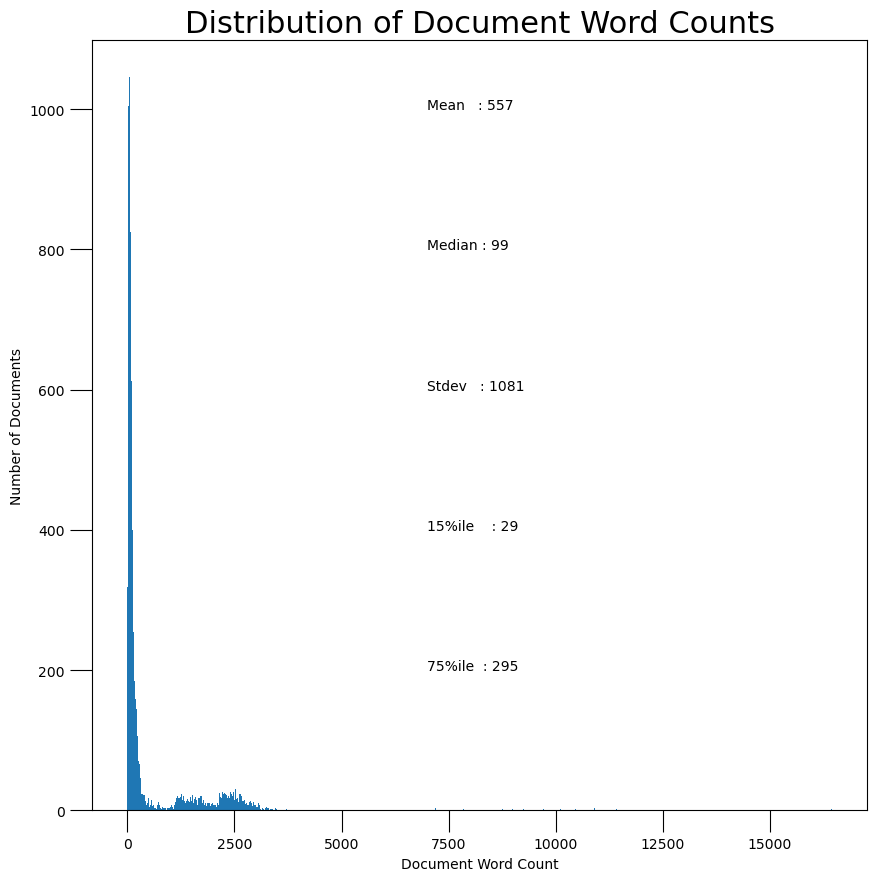

In [353]:
# distribution of Body-lengths

doc_lens = [d for d in df_topics_wb['BodyLength']]

# Plot
plt.figure(figsize=(10,10))
plt.hist(doc_lens, bins = 1000)
plt.text(7000, 1000, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(7000, 800, "Median : " + str(round(np.median(doc_lens))))
plt.text(7000, 600, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(7000, 400, "15%ile    : " + str(round(np.quantile(doc_lens, q=0.1))))
plt.text(7000, 200, "75%ile  : " + str(round(np.quantile(doc_lens, q=0.75))))

plt.gca().set(ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [354]:
df_topics_wb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9374 entries, 10 to 61620
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ThreadId     9374 non-null   object
 1   Description  9374 non-null   object
 2   Subject      9374 non-null   object
 3   Body         9374 non-null   object
 4   SiteName     9374 non-null   object
 5   BodyLength   9374 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 512.6+ KB


In [355]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [356]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')


print('Few of the stop words in english language NLTK library are:\n')
# Printing only a few stop words for demo
stpwrd[:10]

Few of the stop words in english language NLTK library are:



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [357]:
df_topics_wb.Body.head()

10     yes it s for sale from my iphone on jul at co ...
24     it s sold pending pick up now if the sale fall...
80     are you free tomorrow from my iphone on jul at...
133                                          you re wele
140                    yes it s and yes it can be posted
Name: Body, dtype: object

In [358]:
# Creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

In [359]:
counts = count_vectorizer.fit_transform(df_topics_wb['Body'])

In [360]:
# Converting the sparse matrix into a dataframe
counts_df =  pd.DataFrame(counts.toarray(), columns = count_vectorizer.get_feature_names_out())

In [361]:
counts_df.shape

(9374, 10550)

In [362]:
counts_df.head()

aa  aab  aac  aan  aandm  aar  aaron  ab  abbot  abbott  ...  zoom  zoomed  \
0   0    0    0    0      0    0      0   0      0       0  ...     0       0   
1   0    0    0    0      0    0      0   0      0       0  ...     0       0   
2   0    0    0    0      0    0      0   0      0       0  ...     0       0   
3   0    0    0    0      0    0      0   0      0       0  ...     0       0   
4   0    0    0    0      0    0      0   0      0       0  ...     0       0   

   zsxhowjmelbox  ztf  ztoghplqpport  zubair  zubiak  zv  zxbp  zz  
0              0    0              0       0       0   0     0   0  
1              0    0              0       0       0   0     0   0  
2              0    0              0       0       0   0     0   0  
3              0    0              0       0       0   0     0   0  
4              0    0              0       0       0   0     0   0  

[5 rows x 10550 columns]

In [363]:
# Creating an empty dictionary
counts_dict = {}

# Store the words as key-value pairs
for ii, word in enumerate(counts_df.columns):
    counts_dict[word] = sum(counts_df[str(word)])
    word_count = [(i,count) for i,count in list(zip(counts_dict.keys(), counts_dict.values()))]

In [364]:
#most common words

sorted_counts = sorted(word_count, key = lambda x: x[1], reverse = True)
sorted_counts[:40]

[('uk', 21489),
 ('co', 20501),
 ('air', 10571),
 ('medium', 9977),
 ('question', 8879),
 ('registered', 5652),
 ('rifles', 5528),
 ('visit', 3470),
 ('respond', 2982),
 ('message', 2717),
 ('gun', 2582),
 ('number', 2410),
 ('address', 2390),
 ('good', 2339),
 ('west', 2315),
 ('wales', 2216),
 ('london', 2033),
 ('pany', 2015),
 ('mon', 1977),
 ('office', 1975),
 ('road', 1959),
 ('part', 1936),
 ('sussex', 1934),
 ('england', 1928),
 ('follow', 1879),
 ('group', 1874),
 ('miss', 1874),
 ('bn', 1871),
 ('user', 1870),
 ('registration', 1865),
 ('hs', 1864),
 ('everywhere', 1863),
 ('sayers', 1862),
 ('php', 1767),
 ('sale', 1759),
 ('interested', 1739),
 ('please', 1730),
 ('regards', 1646),
 ('png', 1584),
 ('wrote', 1564)]

In [365]:
# Removing the most frequently used irrevelant words 
add_stopwords = ['utm', 'ad', 'source' ,'campaign', 'term', 'stats','website','term','id','qtion','new','reply','rif','sent','guns','hi','still','hello','log','sage','img','available','adds','thanks','px','wa','us','would','mc','friday','media']

In [366]:
#Function to remove additional stopwords 
def remove_add_stopwords(text):
  text = [wd.lower() for wd in text.split() if wd.lower() not in add_stopwords]
  return " ".join(text)

In [367]:
#Removing addtional stopwords according to use case
df_topics_wb['Body'] = df_topics_wb['Body'].apply(remove_add_stopwords)

Lemmatization

In [368]:
lemmatizer = WordNetLemmatizer()

In [369]:
# Lemmatizing an article to see what wordnet returns
for rows in df_topics_wb['Body']:
 print(rows)
 print(len(rows))
 test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
 print(test)
 print(len(test))
 break

yes it s for sale from my iphone on jul at co uk wrote co uk settings home logo png co uk medium question co uk template icons messages image png daveyboy good news someone has enquired about your on bsa scorpion se air rifles co uk bsa scorpion se air rifles air medium question bsa scorpion se air rifles this message was left by andy mcintosh is the air gun for sale to respond just to this co uk adphotos paa bsa scorpion se air rifles jpg co uk bsa scorpion se air rifles air medium question bsa scorpion se air rifles co uk bsa scorpion se air rifles air medium question bsa scorpion se air rifles doncaster north east excellent condition hardly used and less than yrs old es with bsa scope x x bi pod and viper silencer it s a shot pcp with magazine has original muzzle and adaptor for re filli category air to respond to the enquirer just to this co uk settings home logo colour png in now co uk login php medium question in now visit co uk medium question visit don t miss out follow everywh

### Feature Extraction

In [370]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stpwrd, max_features = 4000)

In [371]:
# Taking a sample Article
text_sample = df_topics_wb.Body

In [372]:
# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

In [373]:
# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix))

Content after vectorization: 
  (0, 3974)	1
  (0, 3018)	2
  (0, 1722)	1
  (0, 1792)	1
  (0, 681)	17
  (0, 3668)	18
  (0, 3941)	1
  (0, 3117)	2
  (0, 1578)	2
  (0, 1986)	2
  (0, 2623)	4
  (0, 2133)	8
  (0, 2773)	8
  (0, 3496)	1
  (0, 1635)	1
  (0, 2150)	1
  (0, 1650)	1
  (0, 1416)	1
  (0, 2315)	1
  (0, 3250)	1
  (0, 1093)	1
  (0, 485)	9
  (0, 3053)	8
  (0, 3065)	8
  (0, 93)	13
  :	:
  (9369, 305)	1
  (9369, 573)	1
  (9369, 1075)	1
  (9369, 208)	1
  (9369, 3036)	1
  (9369, 3109)	1
  (9369, 3991)	1
  (9369, 2405)	1
  (9369, 1790)	1
  (9369, 3827)	1
  (9369, 3165)	1
  (9369, 261)	1
  (9369, 785)	1
  (9370, 1405)	2
  (9370, 3457)	2
  (9370, 2472)	2
  (9370, 1955)	2
  (9371, 3974)	1
  (9373, 3974)	1
  (9373, 3603)	2
  (9373, 2610)	1
  (9373, 2936)	1
  (9373, 305)	1
  (9373, 573)	1
  (9373, 1161)	2


### Model Implementation

In [374]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(document_term_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

In [375]:
for i,topic in enumerate(lda.components_):
    print(f'Topic #{i}:')
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0:
['eid', 'uniqid', 'cid', 'interested', 'sale', 'yiv', 'sportsmanguncentre', 'co', 'uk', 'gun']


Topic #1:
['visit', 'mm', 'docusign', 'png', 'registered', 'please', 'medium', 'question', 'co', 'uk']


Topic #2:
['message', 'respond', 'visit', 'registered', 'rifles', 'question', 'medium', 'air', 'co', 'uk']




In [376]:
topic_values = lda.transform(document_term_matrix)
doc_num, topic_num = topic_values.shape

In [377]:
data = pd.DataFrame({'document': df_topics_wb['Body'],'lda': topic_values.argmax(axis=1)})
data.groupby(['lda']).count().unstack()

          lda
document  0      6421
          1      1050
          2      1903
dtype: int64

In [378]:
# most important words for each topic
vocab = count_vectorizer.get_feature_names_out()

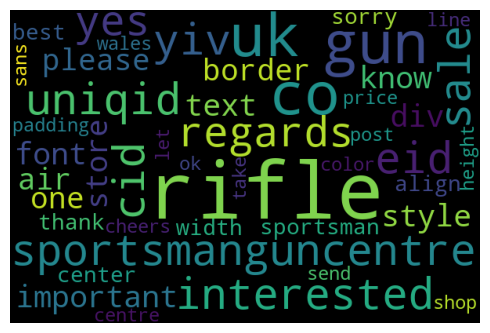

In [379]:
#Word Cloud for 0
word_cloud_lda(0)

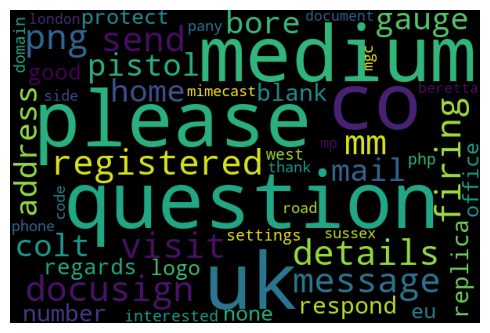

In [380]:
#Word Cloud
word_cloud_lda(1)

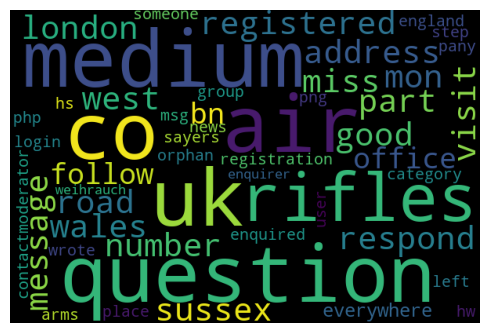

In [381]:
#Word Cloud
word_cloud_lda(2)

## <div class = 'alert alert-danger'>Friday ad</div>

In [382]:
df_topics_wb = dfs_by_sitename['friday-ad.co.uk']

In [383]:
df_topics_wb.head()

ThreadId          Description  \
0     5075644  for catching emails   
1     5075647  for catching emails   
2     5075650  for catching emails   
3  PM_5515048       No Description   
4     5075638       No Description   

                                             Subject  \
0  Message regarding ad: Extremely reliable car. ...   
1         Message regarding ad: 2005 SUBARU FORESTER   
2  Message regarding ad: Recently fully serviced ...   
3                              New Message from site   
4  Message regarding ad: Home help needed by reti...   

                                                Body         SiteName  \
0  do you have this for sale please me directly a...  friday-ad.co.uk   
1  do you have this for sale please me directly a...  friday-ad.co.uk   
2  do you have this for sale please me directly a...  friday-ad.co.uk   
3                        response when api is online  friday-ad.co.uk   
4  there i am looking for part time work and your...  friday-ad.co.uk   

   BodyLength  
0          91  
1          91  
2          91  
3          27  
4         306

In [384]:
df_topics_wb.shape

(9056, 6)

In [385]:
df_topics_wb.isnull().sum()

ThreadId       0
Description    0
Subject        0
Body           0
SiteName       0
BodyLength     0
dtype: int64

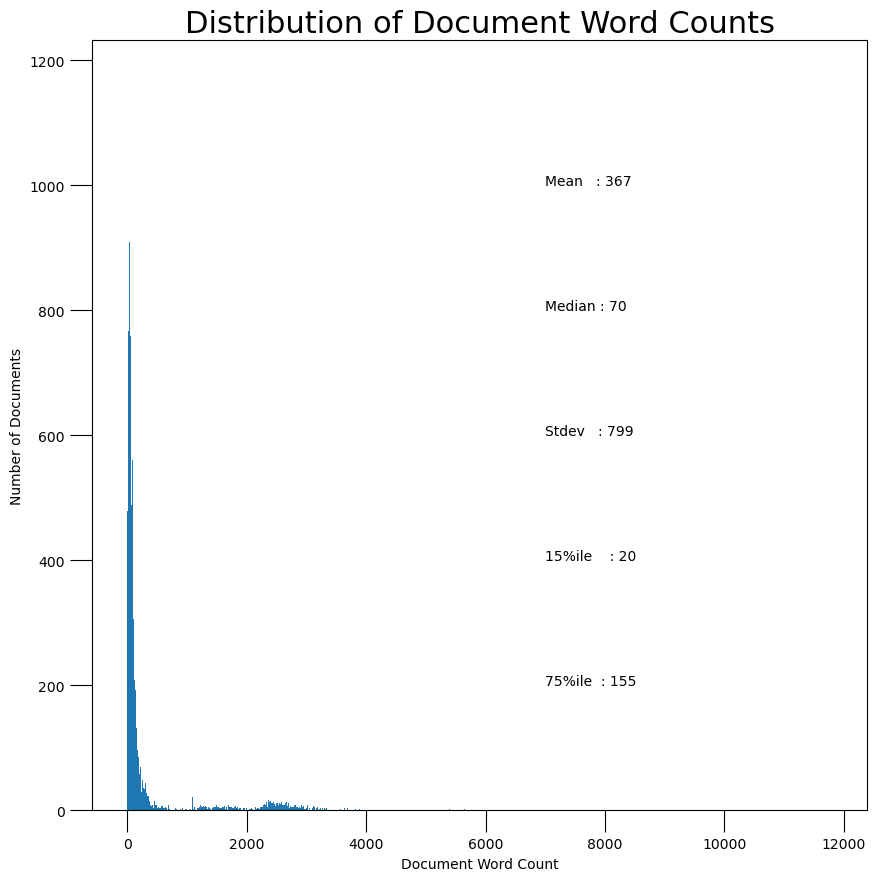

In [386]:
# distribution of Body-lengths

doc_lens = [d for d in df_topics_wb['BodyLength']]

# Plot
plt.figure(figsize=(10,10))
plt.hist(doc_lens, bins = 1000)
plt.text(7000, 1000, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(7000, 800, "Median : " + str(round(np.median(doc_lens))))
plt.text(7000, 600, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(7000, 400, "15%ile    : " + str(round(np.quantile(doc_lens, q=0.1))))
plt.text(7000, 200, "75%ile  : " + str(round(np.quantile(doc_lens, q=0.75))))

plt.gca().set(ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [387]:
df_topics_wb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9056 entries, 0 to 61616
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ThreadId     9056 non-null   object
 1   Description  9056 non-null   object
 2   Subject      9056 non-null   object
 3   Body         9056 non-null   object
 4   SiteName     9056 non-null   object
 5   BodyLength   9056 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 495.2+ KB


In [388]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [389]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')


print('Few of the stop words in english language NLTK library are:\n')
# Printing only a few stop words for demo
stpwrd[:10]

Few of the stop words in english language NLTK library are:



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [390]:
df_topics_wb.Body.head()

0    do you have this for sale please me directly a...
1    do you have this for sale please me directly a...
2    do you have this for sale please me directly a...
3                          response when api is online
4    there i am looking for part time work and your...
Name: Body, dtype: object

In [391]:
# Creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

In [392]:
counts = count_vectorizer.fit_transform(df_topics_wb['Body'])

In [393]:
# Converting the sparse matrix into a dataframe
counts_df =  pd.DataFrame(counts.toarray(), columns = count_vectorizer.get_feature_names_out())

In [394]:
counts_df.shape

(9056, 10503)

In [395]:
counts_df.head()

aa  aaaaaaaa  aab  aadting  aama  aaron  ab  abandonment  abba  abbeystead  \
0   0         0    0        0     0      0   0            0     0           0   
1   0         0    0        0     0      0   0            0     0           0   
2   0         0    0        0     0      0   0            0     0           0   
3   0         0    0        0     0      0   0            0     0           0   
4   0         0    0        0     0      0   0            0     0           0   

   ...  zrunskgtap  zs  zt  zu  zuga  zuyg  zwv  zx  zybv  zzvbyv  
0  ...           0   0   0   0     0     0    0   0     0       0  
1  ...           0   0   0   0     0     0    0   0     0       0  
2  ...           0   0   0   0     0     0    0   0     0       0  
3  ...           0   0   0   0     0     0    0   0     0       0  
4  ...           0   0   0   0     0     0    0   0     0       0  

[5 rows x 10503 columns]

In [396]:
# Creating an empty dictionary
counts_dict = {}

# Store the words as key-value pairs
for ii, word in enumerate(counts_df.columns):
    counts_dict[word] = sum(counts_df[str(word)])
    word_count = [(i,count) for i,count in list(zip(counts_dict.keys(), counts_dict.values()))]

In [397]:
#most common words

sorted_counts = sorted(word_count, key = lambda x: x[1], reverse = True)
sorted_counts[:40]

[('uk', 10532),
 ('co', 10457),
 ('medium', 6307),
 ('question', 5722),
 ('registered', 3269),
 ('visit', 2074),
 ('please', 1875),
 ('respond', 1857),
 ('message', 1799),
 ('sussex', 1723),
 ('good', 1594),
 ('number', 1534),
 ('address', 1505),
 ('west', 1285),
 ('kittens', 1267),
 ('london', 1239),
 ('road', 1226),
 ('part', 1213),
 ('mon', 1202),
 ('pany', 1190),
 ('office', 1166),
 ('bn', 1153),
 ('php', 1148),
 ('sale', 1124),
 ('home', 1102),
 ('miss', 1100),
 ('england', 1094),
 ('group', 1089),
 ('follow', 1086),
 ('user', 1084),
 ('wales', 1081),
 ('registration', 1079),
 ('hs', 1074),
 ('everywhere', 1073),
 ('sayers', 1073),
 ('interested', 1007),
 ('left', 990),
 ('support', 990),
 ('news', 955),
 ('like', 949)]

In [398]:
# Removing the most frequently used irrevelant words 
add_stopwords = ['utm', 'ad', 'source' ,'campaign', 'term', 'stats','website','term','id','qtion','new','reply','rif','sent','thefridayad','hi','still','hello','log','sage','img','available','adds','thanks','px','wa','us','would','mc','friday','media']

In [399]:
#Function to remove additional stopwords 
def remove_add_stopwords(text):
  text = [wd.lower() for wd in text.split() if wd.lower() not in add_stopwords]
  return " ".join(text)

In [400]:
#Removing addtional stopwords according to use case
df_topics_wb['Body'] = df_topics_wb['Body'].apply(remove_add_stopwords)

Lemmatization

In [401]:
lemmatizer = WordNetLemmatizer()

In [402]:
# Lemmatizing an article to see what wordnet returns
for rows in df_topics_wb['Body']:
 print(rows)
 print(len(rows))
 test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
 print(test)
 print(len(test))
 break

do you have this for sale please me directly at ibrahimdeji gmail
65
['do', 'you', 'have', 'this', 'for', 'sale', 'please', 'me', 'directly', 'at', 'ibrahimdeji', 'gmail']
12


### Feature Extraction

In [403]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stpwrd, max_features = 4000)

In [404]:
# Taking a sample Article
text_sample = df_topics_wb.Body

In [405]:
# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

In [406]:
# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix))

Content after vectorization: 
  (0, 3049)	1
  (0, 2671)	1
  (0, 978)	1
  (0, 1645)	1
  (0, 1408)	1
  (1, 3049)	1
  (1, 2671)	1
  (1, 978)	1
  (1, 1645)	1
  (1, 1408)	1
  (2, 3049)	1
  (2, 2671)	1
  (2, 978)	1
  (2, 1645)	1
  (2, 1408)	1
  (3, 2969)	1
  (3, 184)	1
  (3, 2456)	1
  (4, 2032)	2
  (4, 2542)	1
  (4, 3545)	1
  (4, 3913)	1
  (4, 64)	1
  (4, 598)	1
  (4, 1191)	1
  :	:
  (9054, 3510)	1
  (9054, 2372)	1
  (9054, 695)	1
  (9054, 3967)	1
  (9054, 828)	4
  (9054, 2792)	1
  (9054, 3222)	7
  (9054, 3963)	1
  (9054, 3713)	1
  (9054, 904)	1
  (9054, 1495)	1
  (9054, 2449)	1
  (9054, 1855)	7
  (9054, 3413)	1
  (9054, 269)	1
  (9054, 3288)	1
  (9054, 905)	1
  (9054, 906)	1
  (9054, 1511)	9
  (9055, 2714)	1
  (9055, 3760)	1
  (9055, 2792)	1
  (9055, 1093)	1
  (9055, 3114)	1
  (9055, 233)	1


### Model Implementation

In [407]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(document_term_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

In [408]:
for i,topic in enumerate(lda.components_):
    print(f'Topic #{i}:')
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0:
['left', 'visit', 'beautiful', 'respond', 'registered', 'kittens', 'medium', 'question', 'co', 'uk']


Topic #1:
['massage', 'thank', 'orphan', 'contactmoderator', 'looking', 'msg', 'know', 'interested', 'like', 'please']


Topic #2:
['london', 'message', 'sussex', 'respond', 'visit', 'registered', 'question', 'medium', 'co', 'uk']




In [409]:
topic_values = lda.transform(document_term_matrix)
doc_num, topic_num = topic_values.shape

In [410]:
data = pd.DataFrame({'document': df_topics_wb['Body'],'lda': topic_values.argmax(axis=1)})
data.groupby(['lda']).count().unstack()

          lda
document  0      1544
          1      6366
          2      1146
dtype: int64

In [411]:
# Defining a function to plot WordCloud
def word_cloud_lda(index):
  imp_words_topic=""
  comp=lda.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400,max_font_size=100).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

In [412]:
# most important words for each topic
vocab = count_vectorizer.get_feature_names_out()

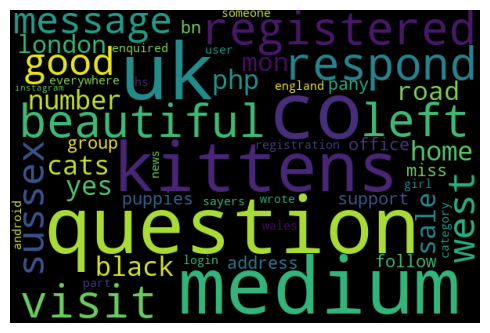

In [413]:
#Word Cloud for 0
word_cloud_lda(0)

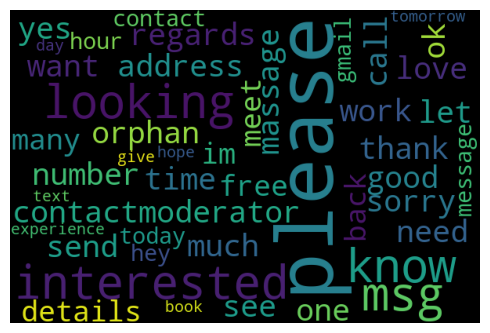

In [414]:
#Word Cloud
word_cloud_lda(1)

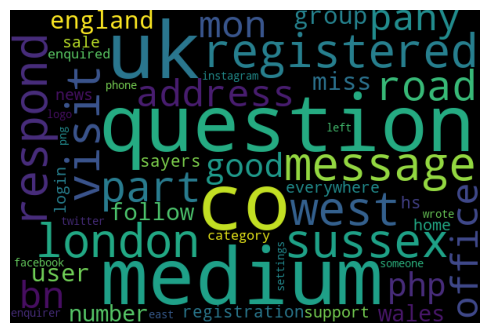

In [415]:
#Word Cloud
word_cloud_lda(2)

## <div class = 'alert alert-danger'>HorseMart</div>

In [416]:
df_topics_wb = dfs_by_sitename['horsemart.co.uk']

In [417]:
df_topics_wb.head()

ThreadId     Description  \
27   0ae85e5583432370d4a4243e13115ce6  No Description   
146                           1236626  No Description   
162                           1238549  No Description   
181                           1238555  No Description   
184                           1238558  No Description   

                                               Subject  \
27   Re: horsemart.co.uk - Message regarding ad: Be...   
146  Re: horsemart.co.uk - reply to your question o...   
162             Message regarding ad: Bay all rounder    
181  Message regarding ad: Absolute gentleman looki...   
184      Message regarding ad: Stunning Palamino filly   

                                                  Body         SiteName  \
27   yes he is do you have whatsapp if so if you se...  horsemart.co.uk   
146  no photo came through do you have any better p...  horsemart.co.uk   
162                    is the horse for sale thank you  horsemart.co.uk   
181                    is the horse for sale thank you  horsemart.co.uk   
184  i am looking for a full long loan i am in surr...  horsemart.co.uk   

     BodyLength  
27         1196  
146        2798  
162          39  
181          39  
184         344

In [418]:
df_topics_wb.shape

(5900, 6)

In [419]:
df_topics_wb.isnull().sum()

ThreadId       0
Description    0
Subject        0
Body           0
SiteName       0
BodyLength     0
dtype: int64

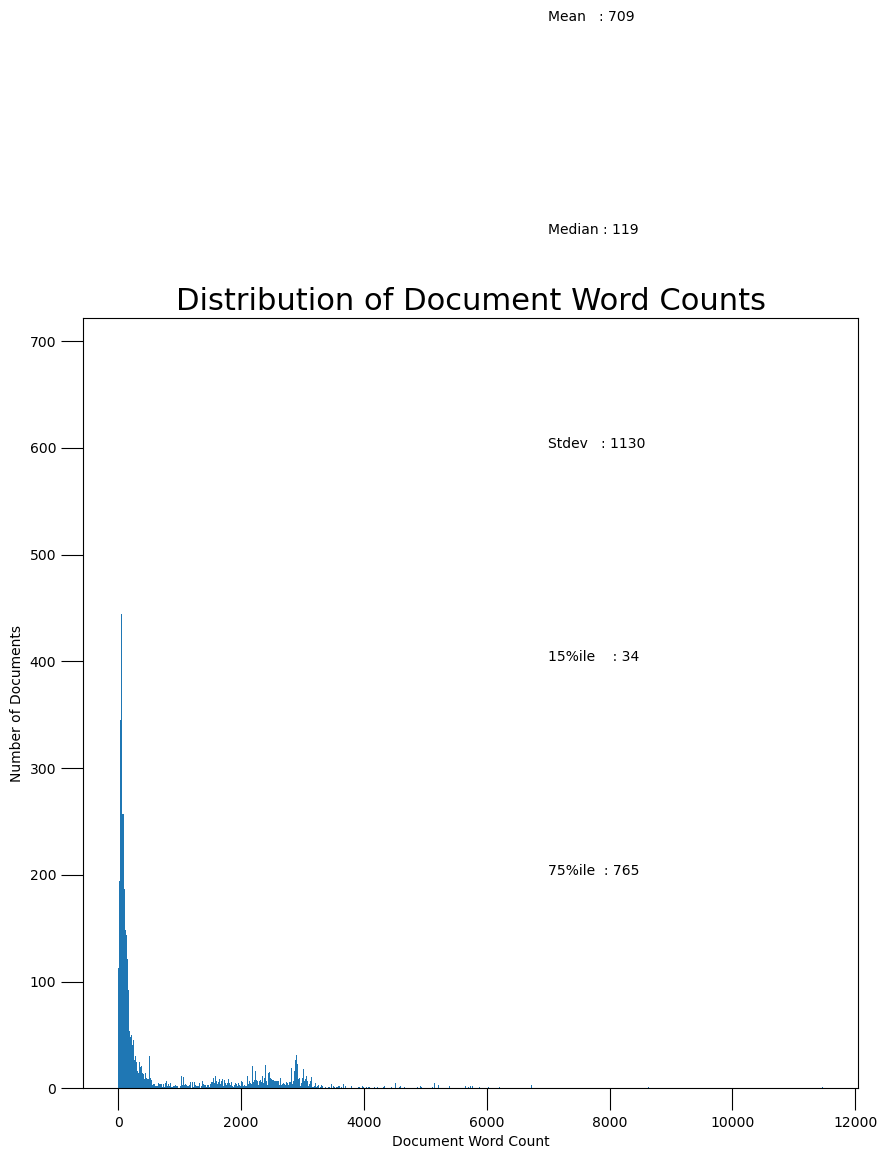

In [420]:
# distribution of Body-lengths

doc_lens = [d for d in df_topics_wb['BodyLength']]

# Plot
plt.figure(figsize=(10,10))
plt.hist(doc_lens, bins = 1000)
plt.text(7000, 1000, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(7000, 800, "Median : " + str(round(np.median(doc_lens))))
plt.text(7000, 600, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(7000, 400, "15%ile    : " + str(round(np.quantile(doc_lens, q=0.1))))
plt.text(7000, 200, "75%ile  : " + str(round(np.quantile(doc_lens, q=0.75))))

plt.gca().set(ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [421]:
df_topics_wb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5900 entries, 27 to 61617
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ThreadId     5900 non-null   object
 1   Description  5900 non-null   object
 2   Subject      5900 non-null   object
 3   Body         5900 non-null   object
 4   SiteName     5900 non-null   object
 5   BodyLength   5900 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 322.7+ KB


In [422]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')


print('Few of the stop words in english language NLTK library are:\n')
# Printing only a few stop words for demo
stpwrd[:10]

Few of the stop words in english language NLTK library are:



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [423]:
df_topics_wb.Body.head()

27     yes he is do you have whatsapp if so if you se...
146    no photo came through do you have any better p...
162                      is the horse for sale thank you
181                      is the horse for sale thank you
184    i am looking for a full long loan i am in surr...
Name: Body, dtype: object

In [424]:
# Creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

In [425]:
counts = count_vectorizer.fit_transform(df_topics_wb['Body'])

In [426]:
# Converting the sparse matrix into a dataframe
counts_df =  pd.DataFrame(counts.toarray(), columns = count_vectorizer.get_feature_names_out())

In [427]:
counts_df.shape

(5900, 8557)

In [428]:
counts_df.head()

aa  aaa  aab  ab  abbeyfeale  abbie  abbisfields  abbot  abdulaziz  \
0   0    0    0   0           0      0            0      0          0   
1   0    0    0   0           0      0            0      0          0   
2   0    0    0   0           0      0            0      0          0   
3   0    0    0   0           0      0            0      0          0   
4   0    0    0   0           0      0            0      0          0   

   aberdeen  ...  zinc  zluwngukzky  zmayo  zoe  zoeezo  \
0         0  ...     0            0      0    0       0   
1         0  ...     0            0      0    0       0   
2         0  ...     0            0      0    0       0   
3         0  ...     0            0      0    0       0   
4         0  ...     0            0      0    0       0   

   zoemeadowsfineartequineandcaninephotography  zone  zoom  zqabwrf  zulu  
0                                            0     0     0        0     0  
1                                            0     0     0        0     0  
2                                            0     0     0        0     0  
3                                            0     0     0        0     0  
4                                            0     0     0        0     0  

[5 rows x 8557 columns]

In [429]:
# Creating an empty dictionary
counts_dict = {}

# Store the words as key-value pairs
for ii, word in enumerate(counts_df.columns):
    counts_dict[word] = sum(counts_df[str(word)])
    word_count = [(i,count) for i,count in list(zip(counts_dict.keys(), counts_dict.values()))]

In [430]:
#most common words

sorted_counts = sorted(word_count, key = lambda x: x[1], reverse = True)
sorted_counts[:40]

[('uk', 17975),
 ('co', 17399),
 ('medium', 8056),
 ('question', 7754),
 ('registered', 4180),
 ('horses', 3730),
 ('gelding', 3693),
 ('hh', 3505),
 ('horse', 3135),
 ('visit', 2576),
 ('respond', 2475),
 ('good', 2166),
 ('message', 2133),
 ('please', 2039),
 ('thank', 1899),
 ('home', 1878),
 ('sale', 1842),
 ('west', 1838),
 ('png', 1746),
 ('number', 1714),
 ('php', 1669),
 ('office', 1605),
 ('pany', 1572),
 ('mare', 1497),
 ('part', 1492),
 ('address', 1456),
 ('mon', 1413),
 ('wales', 1412),
 ('road', 1394),
 ('group', 1368),
 ('follow', 1364),
 ('england', 1360),
 ('registration', 1353),
 ('user', 1351),
 ('sussex', 1348),
 ('miss', 1340),
 ('london', 1330),
 ('bn', 1328),
 ('hs', 1326),
 ('sayers', 1326)]

In [431]:
# Removing the most frequently used irrevelant words 
add_stopwords = ['utm', 'ad', 'source' ,'campaign', 'term', 'stats','website','term','id','qtion','new','reply','rif','sent','guns','hi','still','hello','log','sage','img','available','adds','thanks','px','wa','us','would','mc','friday','media']

In [432]:
#Function to remove additional stopwords 
def remove_add_stopwords(text):
  text = [wd.lower() for wd in text.split() if wd.lower() not in add_stopwords]
  return " ".join(text)

In [433]:
#Removing addtional stopwords according to use case
df_topics_wb['Body'] = df_topics_wb['Body'].apply(remove_add_stopwords)

Lemmatization

In [434]:
lemmatizer = WordNetLemmatizer()

In [435]:
# Lemmatizing an article to see what wordnet returns
for rows in df_topics_wb['Body']:
 print(rows)
 print(len(rows))
 test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
 print(test)
 print(len(test))
 break

yes he is do you have whatsapp if so if you send me your number i can send some on there as it may be easier from my iphone on jul at co uk wrote darren hardy good news someone has enquired about your on beautiful black colt this message was left by peter smith is the horse any more photos videos please phone nr to respond just to this beautiful black colt lincoln east midlands beautiful black colt foal to make hh quirifino z x odermus r x animo elite this beautiful colt will make a great showjumper or eventer with lovely elastic paces and a very bold atti category horses to respond to the enquirer just to this in now visit don t miss out follow everywhere you were this as registered user of co uk part of the group registered office address london road sayers mon west sussex bn hs registered in england and wales pany registration number
848
['yes', 'he', 'is', 'do', 'you', 'have', 'whatsapp', 'if', 'so', 'if', 'you', 'send', 'me', 'your', 'number', 'i', 'can', 'send', 'some', 'on', 'th

### Feature Extraction

In [436]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stpwrd, max_features = 4000)

In [437]:
# Taking a sample Article
text_sample = df_topics_wb.Body

In [438]:
# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

In [439]:
# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix))

Content after vectorization: 
  (0, 3969)	1
  (0, 3871)	1
  (0, 3111)	2
  (0, 2389)	2
  (0, 2125)	1
  (0, 951)	1
  (0, 1689)	1
  (0, 1756)	1
  (0, 640)	2
  (0, 3673)	2
  (0, 3944)	1
  (0, 795)	1
  (0, 1352)	1
  (0, 2347)	1
  (0, 3250)	1
  (0, 1017)	1
  (0, 277)	4
  (0, 325)	3
  (0, 662)	4
  (0, 2163)	1
  (0, 1882)	1
  (0, 2576)	1
  (0, 3233)	1
  (0, 1539)	1
  (0, 2594)	1
  :	:
  (5899, 1211)	1
  (5899, 1354)	1
  (5899, 758)	1
  (5899, 1182)	1
  (5899, 3056)	1
  (5899, 296)	2
  (5899, 153)	1
  (5899, 2504)	1
  (5899, 316)	1
  (5899, 3003)	1
  (5899, 2919)	1
  (5899, 2938)	1
  (5899, 1393)	1
  (5899, 3393)	1
  (5899, 2616)	1
  (5899, 905)	2
  (5899, 3764)	1
  (5899, 3002)	1
  (5899, 216)	1
  (5899, 2454)	1
  (5899, 1033)	1
  (5899, 1282)	4
  (5899, 3543)	1
  (5899, 520)	1
  (5899, 3919)	1


### Model Implementation

In [440]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(document_term_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

In [441]:
for i,topic in enumerate(lda.components_):
    print(f'Topic #{i}:')
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0:
['respond', 'visit', 'horses', 'hh', 'gelding', 'registered', 'question', 'medium', 'co', 'uk']


Topic #1:
['equi', 'xx', 'sale', 'trailers', 'trek', 'uk', 'ton', 'horseboxes', 'bespoke', 'ukaa']


Topic #2:
['pony', 'like', 'could', 'send', 'looking', 'interested', 'sale', 'please', 'thank', 'horse']




In [442]:
topic_values = lda.transform(document_term_matrix)
doc_num, topic_num = topic_values.shape

In [443]:
data = pd.DataFrame({'document': df_topics_wb['Body'],'lda': topic_values.argmax(axis=1)})
data.groupby(['lda']).count().unstack()

          lda
document  0      1369
          1       526
          2      4005
dtype: int64

In [444]:
# Defining a function to plot WordCloud
def word_cloud_lda(index):
  imp_words_topic=""
  comp=lda.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400,max_font_size=100).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

In [445]:
# most important words for each topic
vocab = count_vectorizer.get_feature_names_out()

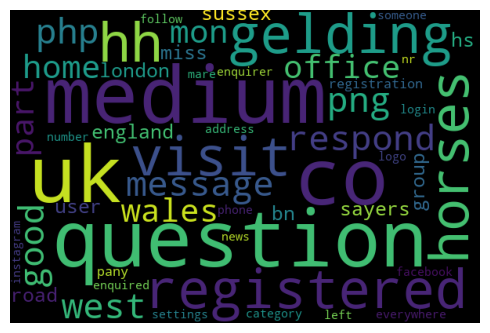

In [446]:
#Word Cloud for 0
word_cloud_lda(0)

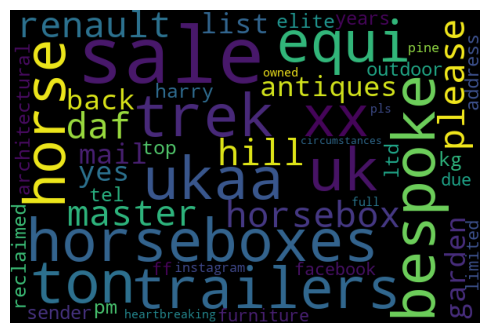

In [447]:
#Word Cloud
word_cloud_lda(1)

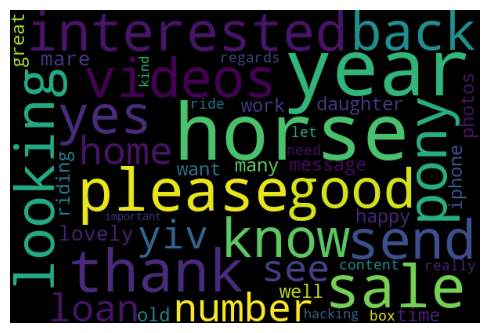

In [448]:
#Word Cloud
word_cloud_lda(2)

## <div class = 'alert alert-danger'>BirdTrader</div>

In [449]:
df_topics_wb = dfs_by_sitename['birdtrader.co.uk']

In [450]:
df_topics_wb.head()

ThreadId       Description                     Subject  \
151   394081  birdtrader.co.uk  Your Advert on  Birdtrader   
168   393499  birdtrader.co.uk  Your Advert on  Birdtrader   
197   393307  birdtrader.co.uk  Your Advert on  Birdtrader   
275   389305  birdtrader.co.uk  Your Advert on  Birdtrader   
382   394138  birdtrader.co.uk  Your Advert on  Birdtrader   

                                                  Body          SiteName  \
151                                we are witham essex  birdtrader.co.uk   
168  david yes but the platform is useless for stuf...  birdtrader.co.uk   
197  good morning can you send photos please best r...  birdtrader.co.uk   
275                                 lanner falcons are  birdtrader.co.uk   
382  barry do you have a young bird for sale if so ...  birdtrader.co.uk   

     BodyLength  
151          29  
168         119  
197          78  
275          28  
382          92

In [451]:
df_topics_wb.shape

(1765, 6)

In [452]:
df_topics_wb.isnull().sum()

ThreadId       0
Description    0
Subject        0
Body           0
SiteName       0
BodyLength     0
dtype: int64

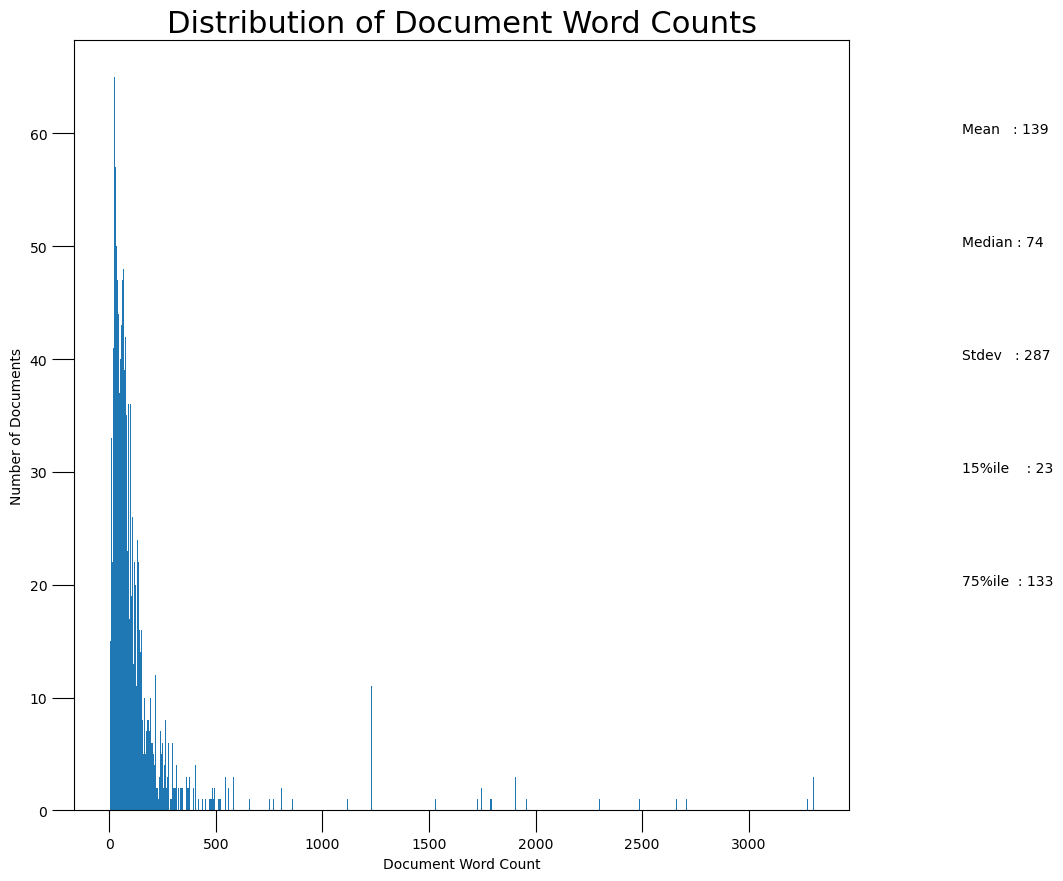

In [453]:
# distribution of Body-lengths

doc_lens = [d for d in df_topics_wb['BodyLength']]

# Plot
plt.figure(figsize=(10,10))
plt.hist(doc_lens, bins = 1000)
plt.text(4000, 60, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(4000, 50, "Median : " + str(round(np.median(doc_lens))))
plt.text(4000, 40, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(4000, 30, "15%ile    : " + str(round(np.quantile(doc_lens, q=0.1))))
plt.text(4000, 20, "75%ile  : " + str(round(np.quantile(doc_lens, q=0.75))))

plt.gca().set(ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [454]:
df_topics_wb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1765 entries, 151 to 61247
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ThreadId     1765 non-null   object
 1   Description  1765 non-null   object
 2   Subject      1765 non-null   object
 3   Body         1765 non-null   object
 4   SiteName     1765 non-null   object
 5   BodyLength   1765 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 96.5+ KB


In [455]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')


print('Few of the stop words in english language NLTK library are:\n')
# Printing only a few stop words for demo
stpwrd[:10]

Few of the stop words in english language NLTK library are:



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [456]:
df_topics_wb.Body.head()

151                                  we are witham essex
168    david yes but the platform is useless for stuf...
197    good morning can you send photos please best r...
275                                   lanner falcons are
382    barry do you have a young bird for sale if so ...
Name: Body, dtype: object

In [457]:
# Creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

In [458]:
counts = count_vectorizer.fit_transform(df_topics_wb['Body'])

In [459]:
# Converting the sparse matrix into a dataframe
counts_df =  pd.DataFrame(counts.toarray(), columns = count_vectorizer.get_feature_names_out())

In [460]:
counts_df.shape

(1765, 2984)

In [461]:
counts_df.head()

aab  abatement  abby  abdul  abhi  abhishek  abit  able  abouts  abroad  \
0    0          0     0      0     0         0     0     0       0       0   
1    0          0     0      0     0         0     0     0       0       0   
2    0          0     0      0     0         0     0     0       0       0   
3    0          0     0      0     0         0     0     0       0       0   
4    0          0     0      0     0         0     0     0       0       0   

   ...  yrs  ysg  ywnjamvnywi  ywnlagjiymy  ywnmymzizmk  ywnmymzizmm  \
0  ...    0    0            0            0            0            0   
1  ...    0    0            0            0            0            0   
2  ...    0    0            0            0            0            0   
3  ...    0    0            0            0            0            0   
4  ...    0    0            0            0            0            0   

   ywnnawppy  ywnnz  ywnnzmnmzmy  zebra  
0          0      0            0      0  
1          0      0            0      0  
2          0      0            0      0  
3          0      0            0      0  
4          0      0            0      0  

[5 rows x 2984 columns]

In [462]:
# Creating an empty dictionary
counts_dict = {}

# Store the words as key-value pairs
for ii, word in enumerate(counts_df.columns):
    counts_dict[word] = sum(counts_df[str(word)])
    word_count = [(i,count) for i,count in list(zip(counts_dict.keys(), counts_dict.values()))]

In [463]:
#most common words

sorted_counts = sorted(word_count, key = lambda x: x[1], reverse = True)
sorted_counts[:40]

[('please', 386),
 ('uk', 315),
 ('co', 283),
 ('interested', 193),
 ('auto', 176),
 ('medium', 176),
 ('yes', 172),
 ('sorry', 167),
 ('sale', 152),
 ('get', 150),
 ('birds', 144),
 ('one', 144),
 ('bird', 138),
 ('female', 137),
 ('message', 131),
 ('regards', 131),
 ('could', 127),
 ('got', 124),
 ('looking', 117),
 ('male', 114),
 ('pair', 113),
 ('send', 111),
 ('need', 109),
 ('number', 109),
 ('buyer', 106),
 ('good', 104),
 ('know', 103),
 ('old', 99),
 ('thank', 98),
 ('call', 96),
 ('many', 93),
 ('owl', 83),
 ('owls', 82),
 ('contact', 80),
 ('like', 80),
 ('best', 77),
 ('let', 75),
 ('year', 73),
 ('want', 71),
 ('day', 69)]

In [464]:
# Removing the most frequently used irrevelant words 
add_stopwords = ['utm','inteted', 'ad', 'source' ,'campaign', 'term', 'stats','website','term','id','qtion','new','reply','rif','sent','guns','hi','still','hello','log','sage','img','available','adds','thanks','px','wa','us','would','mc','friday','media']

In [465]:
#Function to remove additional stopwords 
def remove_add_stopwords(text):
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in add_stopwords]  # Remove stopwords
    return ' '.join(filtered_words)

In [466]:
#Removing addtional stopwords according to use case
df_topics_wb['Body'] = df_topics_wb['Body'].apply(remove_add_stopwords)

Lemmatization

In [467]:
lemmatizer = WordNetLemmatizer()

In [468]:
# Lemmatizing an article to see what wordnet returns
for rows in df_topics_wb['Body']:
    print(rows)
    print(len(rows))
    test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
    print(test)
    print(len(test))
    break

we are witham essex
19
['we', 'are', 'witham', 'essex']
4


### Feature Extraction

In [469]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stpwrd, max_features = 4000)

In [470]:
# Taking a sample Article
text_sample = df_topics_wb.Body

In [471]:
# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

In [472]:
# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix))

Content after vectorization: 
  (0, 2923)	1
  (0, 840)	1
  (1, 648)	1
  (1, 2960)	1
  (1, 1984)	1
  (1, 2783)	1
  (1, 2530)	1
  (1, 1483)	1
  (1, 1987)	1
  (1, 1054)	1
  (1, 1674)	1
  (1, 1780)	1
  (1, 24)	1
  (1, 633)	1
  (2, 1987)	1
  (2, 1075)	1
  (2, 1689)	1
  (2, 2344)	1
  (2, 1960)	1
  (2, 268)	1
  (2, 2170)	1
  (2, 230)	1
  (3, 1442)	1
  (3, 889)	1
  (4, 228)	1
  :	:
  (1759, 1311)	1
  (1759, 1863)	1
  (1759, 1806)	1
  (1759, 2491)	1
  (1760, 1987)	1
  (1760, 2170)	1
  (1760, 406)	1
  (1760, 2337)	1
  (1760, 281)	1
  (1760, 1528)	1
  (1760, 40)	1
  (1760, 1702)	1
  (1760, 763)	1
  (1760, 1228)	1
  (1760, 2038)	1
  (1760, 1210)	1
  (1760, 1049)	1
  (1760, 2629)	1
  (1760, 2807)	1
  (1760, 2911)	1
  (1762, 921)	1
  (1763, 1987)	1
  (1763, 2344)	1
  (1763, 1969)	1
  (1764, 2960)	1


### Model Implementation

In [473]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(document_term_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

In [474]:
for i,topic in enumerate(lda.components_):
    print(f'Topic #{i}:')
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0:
['please', 'get', 'enquiry', 'yes', 'message', 'buyer', 'auto', 'medium', 'co', 'uk']


Topic #1:
['interested', 'bird', 'looking', 'best', 'get', 'read', 'please', 'day', 'birds', 'sorry']


Topic #2:
['know', 'could', 'sale', 'regards', 'got', 'male', 'female', 'one', 'interested', 'please']




In [475]:
topic_values = lda.transform(document_term_matrix)
doc_num, topic_num = topic_values.shape

In [476]:
data = pd.DataFrame({'document': df_topics_wb['Body'],'lda': topic_values.argmax(axis=1)})
data.groupby(['lda']).count().unstack()

          lda
document  0      342
          1      452
          2      971
dtype: int64

In [477]:
# Defining a function to plot WordCloud
def word_cloud_lda(index):
  imp_words_topic=""
  comp=lda.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400,max_font_size=100).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

In [478]:
# most important words for each topic
vocab = count_vectorizer.get_feature_names_out()

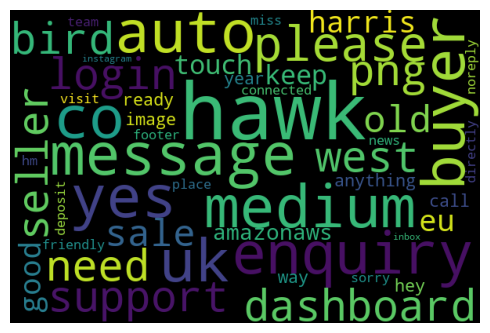

In [479]:
#Word Cloud for 0
word_cloud_lda(0)

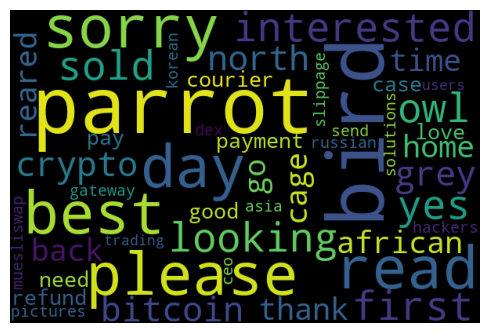

In [480]:
#Word Cloud
word_cloud_lda(1)

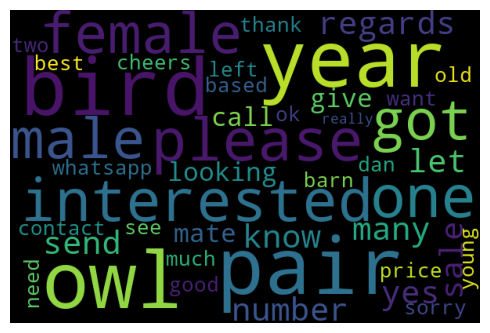

In [481]:
#Word Cloud
word_cloud_lda(2)

## <div class = 'alert alert-danger'>FarmingAds</div>

In [482]:
df_topics_wb = dfs_by_sitename['farmingads.co.uk']

In [483]:
df_topics_wb.head()

ThreadId     Description  \
177     TC_572  No Description   
2080     78839  No Description   
2115     78842  No Description   
2428     78845  No Description   
3148  PM_65315  No Description   

                                                Subject  \
177                               New Contact to Trader   
2080  Message regarding ad: Southdown Ewe Lambs Born...   
2115  Message regarding ad: 5 POL hens for sale - ma...   
2428  Message regarding ad: 4 Gorgeous Female Pygmy ...   
3148                              New Message from site   

                                                   Body          SiteName  \
177   i saw this add and i was wondering if you have...  farmingads.co.uk   
2080  jenny do you have a southdown ewe for sale rig...  farmingads.co.uk   
2115              are these for sale i like to purchase  farmingads.co.uk   
2428  you be prepared to do a deal for two goats reg...  farmingads.co.uk   
3148  clare do you have a cph number and when you wa...  farmingads.co.uk   

      BodyLength  
177           77  
2080         126  
2115          49  
2428          72  
3148          97

In [484]:
df_topics_wb.shape

(342, 6)

In [485]:
df_topics_wb.isnull().sum()

ThreadId       0
Description    0
Subject        0
Body           0
SiteName       0
BodyLength     0
dtype: int64

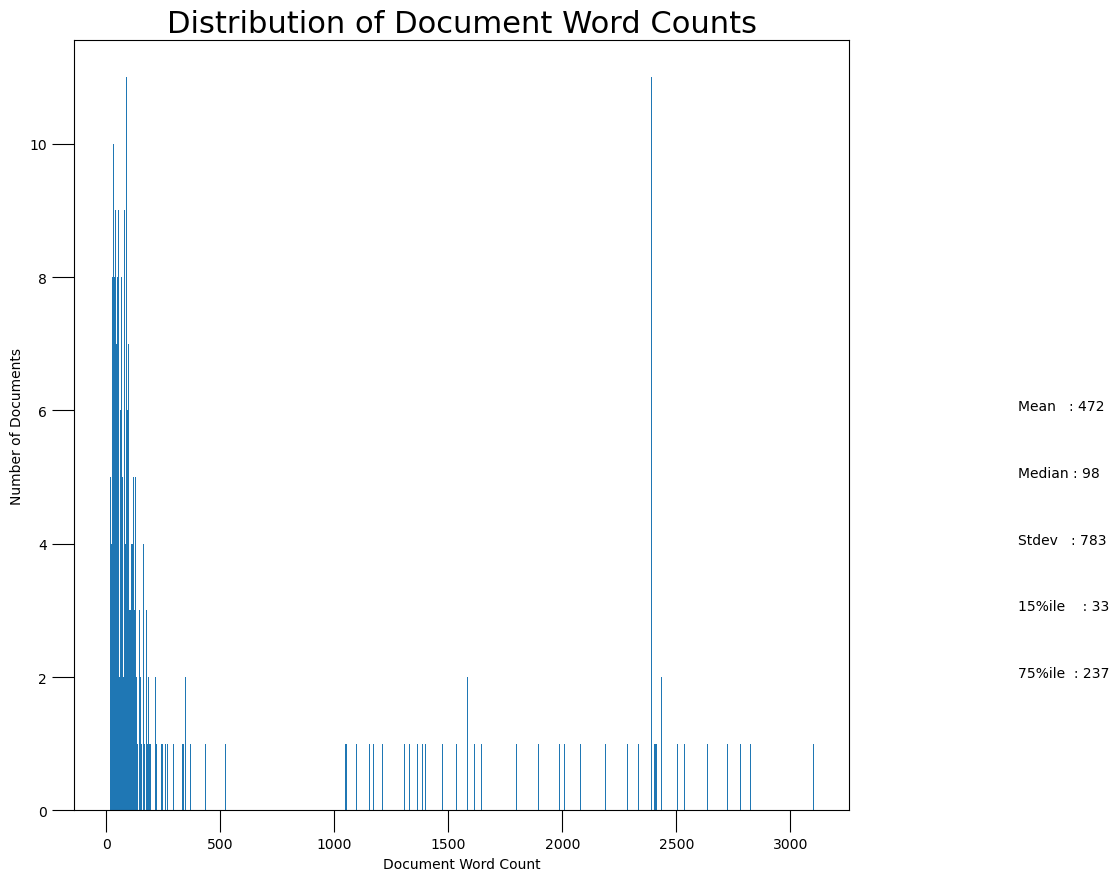

In [486]:
# distribution of Body-lengths

doc_lens = [d for d in df_topics_wb['BodyLength']]

# Plot
plt.figure(figsize=(10,10))
plt.hist(doc_lens, bins = 1000)
plt.text(4000, 6, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(4000, 5, "Median : " + str(round(np.median(doc_lens))))
plt.text(4000, 4, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(4000, 3, "15%ile    : " + str(round(np.quantile(doc_lens, q=0.1))))
plt.text(4000, 2, "75%ile  : " + str(round(np.quantile(doc_lens, q=0.75))))

plt.gca().set(ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [487]:
df_topics_wb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 177 to 61621
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ThreadId     342 non-null    object
 1   Description  342 non-null    object
 2   Subject      342 non-null    object
 3   Body         342 non-null    object
 4   SiteName     342 non-null    object
 5   BodyLength   342 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 18.7+ KB


In [488]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')


print('Few of the stop words in english language NLTK library are:\n')
# Printing only a few stop words for demo
stpwrd[:10]

Few of the stop words in english language NLTK library are:



['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [489]:
df_topics_wb.Body.head()

177     i saw this add and i was wondering if you have...
2080    jenny do you have a southdown ewe for sale rig...
2115                are these for sale i like to purchase
2428    you be prepared to do a deal for two goats reg...
3148    clare do you have a cph number and when you wa...
Name: Body, dtype: object

In [490]:
# Creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

In [491]:
counts = count_vectorizer.fit_transform(df_topics_wb['Body'])

In [492]:
# Converting the sparse matrix into a dataframe
counts_df =  pd.DataFrame(counts.toarray(), columns = count_vectorizer.get_feature_names_out())

In [493]:
counts_df.shape

(342, 1417)

In [494]:
counts_df.head()

aab  ab  abbie  aberdeen  able  abouts  accept  accepted  access  achieved  \
0    0   0      0         0     0       0       0         0       0         0   
1    0   0      0         0     0       0       0         0       0         0   
2    0   0      0         0     0       0       0         0       0         0   
3    0   0      0         0     0       0       0         0       0         0   
4    0   0      0         0     0       0       0         0       0         0   

   ...  yet  yews  yiv  youd  young  yr  yrs  ysg  zues  zwartble  
0  ...    0     0    0     0      0   0    0    0     0         0  
1  ...    0     0    0     0      0   0    0    0     0         0  
2  ...    0     0    0     0      0   0    0    0     0         0  
3  ...    0     0    0     0      0   0    0    0     0         0  
4  ...    0     0    0     0      0   0    0    0     0         0  

[5 rows x 1417 columns]

In [495]:
# Creating an empty dictionary
counts_dict = {}

# Store the words as key-value pairs
for ii, word in enumerate(counts_df.columns):
    counts_dict[word] = sum(counts_df[str(word)])
    word_count = [(i,count) for i,count in list(zip(counts_dict.keys(), counts_dict.values()))]

In [496]:
#most common words

sorted_counts = sorted(word_count, key = lambda x: x[1], reverse = True)
sorted_counts[:40]

[('co', 558),
 ('uk', 557),
 ('medium', 314),
 ('question', 300),
 ('amp', 264),
 ('registered', 239),
 ('farming', 188),
 ('ads', 186),
 ('sale', 162),
 ('livestock', 157),
 ('respond', 126),
 ('visit', 125),
 ('west', 104),
 ('good', 102),
 ('message', 99),
 ('number', 98),
 ('please', 98),
 ('sussex', 89),
 ('lambs', 87),
 ('address', 79),
 ('khaki', 78),
 ('left', 77),
 ('wales', 77),
 ('ram', 71),
 ('england', 69),
 ('hs', 69),
 ('mon', 69),
 ('pany', 69),
 ('part', 69),
 ('phone', 69),
 ('road', 69),
 ('group', 68),
 ('london', 68),
 ('office', 68),
 ('bn', 67),
 ('everywhere', 67),
 ('follow', 67),
 ('miss', 67),
 ('registration', 67),
 ('sayers', 67)]

In [497]:
# Removing the most frequently used irrevelant words 
add_stopwords = ['utm','inteted', 'ad', 'source' ,'campaign', 'term', 'stats','website','term','id','qtion','new','reply','rif','sent','guns','hi','still','hello','log','sage','img','available','adds','thanks','px','wa','us','would','mc','friday','media']

In [498]:
#Function to remove additional stopwords 
def remove_add_stopwords(text):
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in add_stopwords]  # Remove stopwords
    return ' '.join(filtered_words)

In [499]:
#Removing addtional stopwords according to use case
df_topics_wb['Body'] = df_topics_wb['Body'].apply(remove_add_stopwords)

Lemmatization

In [500]:
lemmatizer = WordNetLemmatizer()

In [501]:
# Lemmatizing an article to see what wordnet returns
for rows in df_topics_wb['Body']:
    print(rows)
    print(len(rows))
    test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
    print(test)
    print(len(test))
    break

i saw this add and i was wondering if you have a billy for sale thank you
73
['i', 'saw', 'this', 'add', 'and', 'i', 'wa', 'wondering', 'if', 'you', 'have', 'a', 'billy', 'for', 'sale', 'thank', 'you']
17


### Feature Extraction

In [502]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stpwrd, max_features = 4000)

In [503]:
# Taking a sample Article
text_sample = df_topics_wb.Body

In [504]:
# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

In [505]:
# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix))

Content after vectorization: 
  (0, 1090)	1
  (0, 14)	1
  (0, 1387)	1
  (0, 117)	1
  (0, 1079)	1
  (0, 1246)	1
  (1, 1079)	1
  (1, 634)	1
  (1, 1171)	1
  (1, 397)	1
  (1, 1045)	1
  (1, 1343)	1
  (1, 920)	1
  (1, 638)	1
  (1, 268)	1
  (1, 1132)	1
  (1, 760)	1
  (1, 749)	1
  (2, 1079)	1
  (2, 708)	1
  (2, 982)	1
  (3, 962)	1
  (3, 301)	1
  (3, 1300)	1
  (3, 484)	1
  :	:
  (339, 256)	1
  (339, 196)	1
  (339, 1293)	1
  (339, 1396)	1
  (339, 1073)	1
  (339, 305)	1
  (340, 612)	1
  (340, 1163)	1
  (340, 678)	1
  (340, 272)	1
  (340, 72)	1
  (340, 309)	1
  (340, 611)	1
  (340, 340)	1
  (340, 1255)	1
  (340, 582)	1
  (340, 410)	1
  (340, 75)	1
  (340, 609)	1
  (340, 997)	1
  (341, 612)	1
  (341, 616)	1
  (341, 695)	1
  (341, 1367)	1
  (341, 305)	1


In [528]:
# preparing for GridSearchCV
search_params = {
  'n_components': [20, 40, 60],
  'learning_decay': [.5, .7]
}

### Model Implementation

In [532]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Set up LDA with the options we'll keep static
lda = LatentDirichletAllocation(learning_method='online')

# Try all of the options
gridsearch = GridSearchCV(lda, param_grid=search_params, n_jobs=-1, verbose=1)
gridsearch.fit(document_term_matrix)

# What did we find?
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Model's Params:  {'learning_decay': 0.7, 'n_components': 20}
Best Log Likelihood Score:  -27051.00201824784


In [535]:
lda = LatentDirichletAllocation(n_components=20, random_state=42,learning_decay = 0.7)
lda.fit(document_term_matrix)

LatentDirichletAllocation(n_components=20, random_state=42)

In [536]:
for i,topic in enumerate(lda.components_):
    print(f'Topic #{i}:')
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

Topic #0:
['look', 'lovely', 'ukef', 'ios', 'ysg', 'aab', 'android', 'ms', 'aka', 'outlook']


Topic #1:
['tom', 'thank', 'want', 'buy', 'day', 'chicks', 'many', 'old', 'please', 'hens']


Topic #2:
['address', 'please', 'left', 'price', 'important', 'collie', 'working', 'puppies', 'border', 'yiv']


Topic #3:
['duck', 'go', 'sorry', 'one', 'looking', 'female', 'ram', 'older', 'sale', 'got']


Topic #4:
['please', 'natured', 'sweet', 'year', 'know', 'biscuit', 'bourbon', 'twiglet', 'sheep', 'sale']


Topic #5:
['like', 'regards', 'ducks', 'graze', 'sheep', 'got', 'james', 'estates', 'may', 'heckfield']


Topic #6:
['ads', 'farming', 'contactmoderator', 'msg', 'orphan', 'billy', 'medium', 'registered', 'co', 'uk']


Topic #7:
['west', 'visit', 'respond', 'farming', 'ads', 'registered', 'medium', 'question', 'co', 'uk']


Topic #8:
['gilts', 'let', 'farm', 'deliver', 'per', 'shipping', 'sxm', 'pick', 'aberdeen', 'ok']


Topic #9:
['land', 'forever', 'thankyou', 'boys', 'pigs', 'give', 'c

In [537]:
topic_values = lda.transform(document_term_matrix)
doc_num, topic_num = topic_values.shape

In [538]:
data = pd.DataFrame({'document': df_topics_wb['Body'],'lda': topic_values.argmax(axis=1)})
data.groupby(['lda']).count().unstack()

          lda
document  0      18
          1      23
          2      17
          3      16
          4      11
          5       7
          6      15
          7      27
          8      10
          9      17
          10     23
          11     11
          12      9
          13     16
          14      8
          15     25
          16     40
          17      8
          18     16
          19     25
dtype: int64

In [539]:
# Defining a function to plot WordCloud
def word_cloud_lda(index):
    imp_words_topic=""
    comp=lda.components_[index]
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
    for word in sorted_words:
        imp_words_topic=imp_words_topic+" "+word[0]

    wordcloud = WordCloud(width=600, height=400,max_font_size=100).generate(imp_words_topic)
    plt.figure( figsize=(5,5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [540]:
# most important words for each topic
vocab = count_vectorizer.get_feature_names_out()

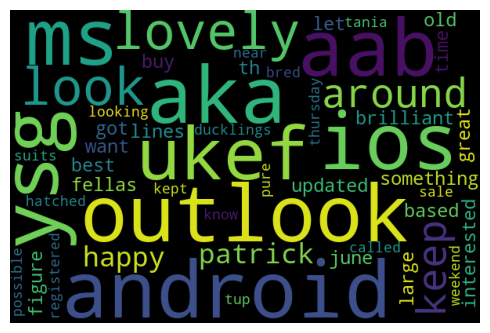

In [541]:
#Word Cloud for 0
word_cloud_lda(0)

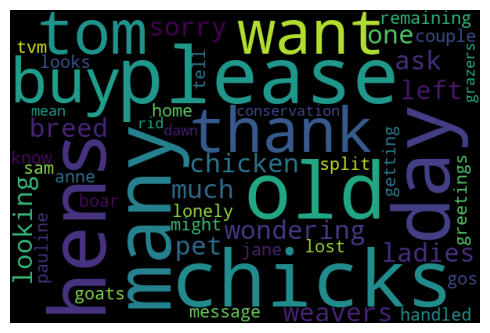

In [542]:
#Word Cloud
word_cloud_lda(1)

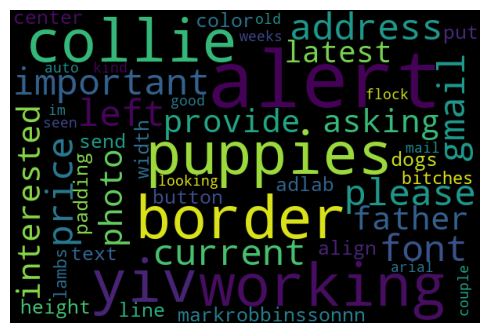

In [543]:
#Word Cloud
word_cloud_lda(2)

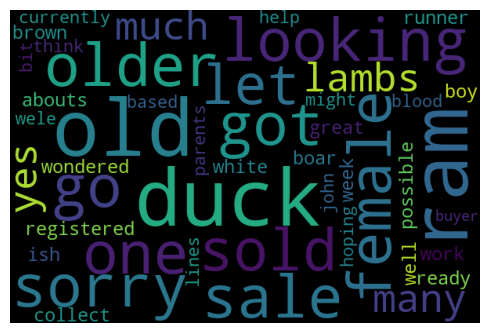

In [544]:
#Word Cloud
word_cloud_lda(3)

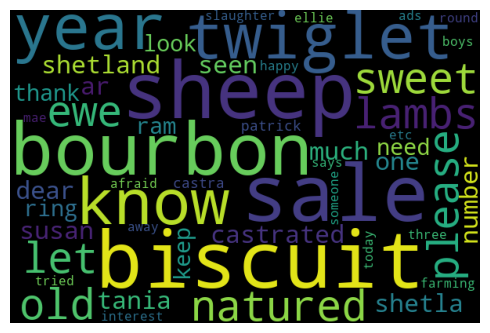

In [545]:
#Word Cloud
word_cloud_lda(4)

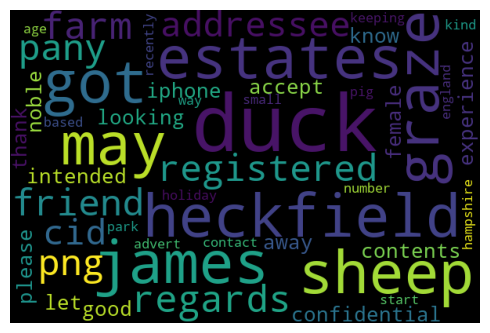

In [546]:
#Word Cloud
word_cloud_lda(5)

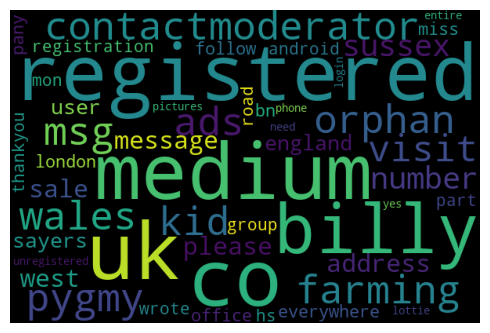

In [547]:
#Word Cloud
word_cloud_lda(6)

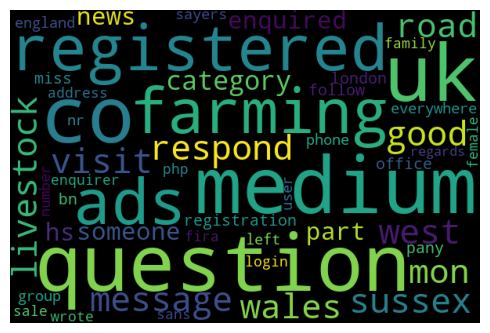

In [548]:
#Word Cloud
word_cloud_lda(7)

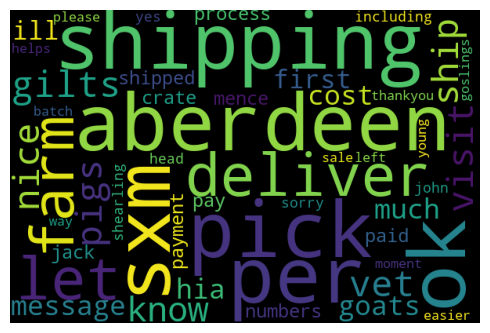

In [549]:
#Word Cloud
word_cloud_lda(8)

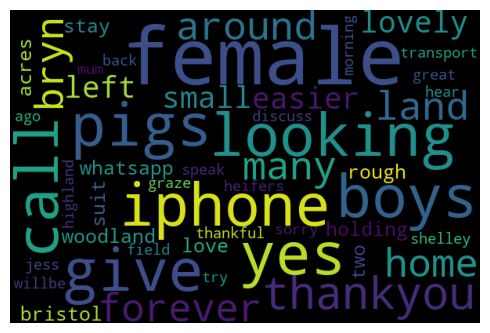

In [550]:
#Word Cloud
word_cloud_lda(9)

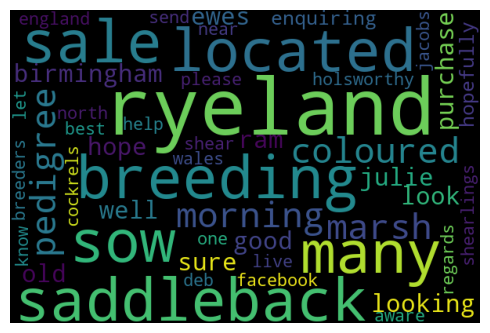

In [551]:
#Word Cloud
word_cloud_lda(10)

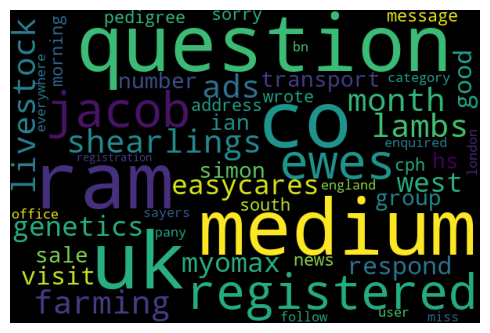

In [552]:
#Word Cloud
word_cloud_lda(11)

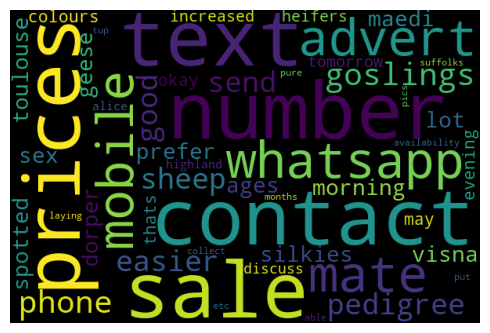

In [553]:
#Word Cloud
word_cloud_lda(12)

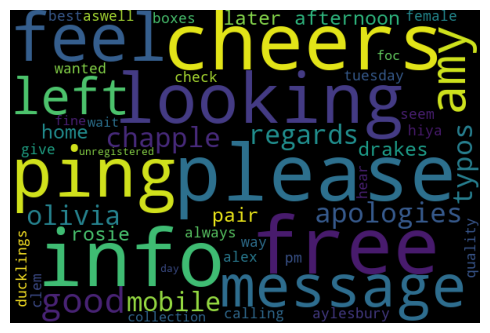

In [554]:
#Word Cloud
word_cloud_lda(13)

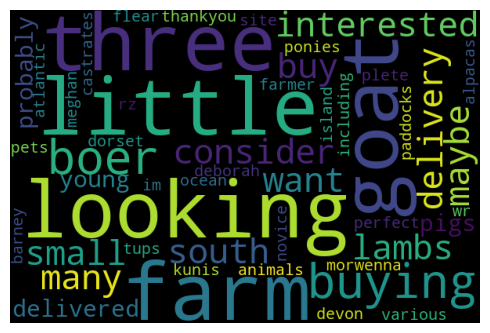

In [555]:
#Word Cloud
word_cloud_lda(14)

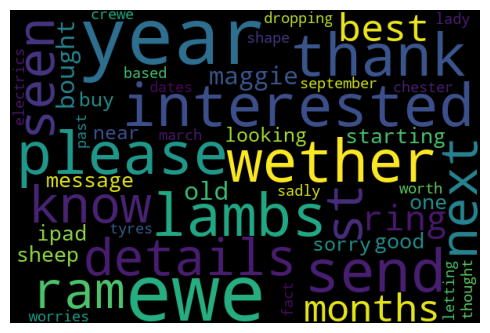

In [556]:
#Word Cloud
word_cloud_lda(15)

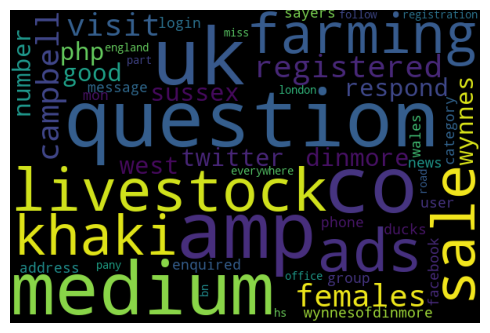

In [557]:
#Word Cloud
word_cloud_lda(16)

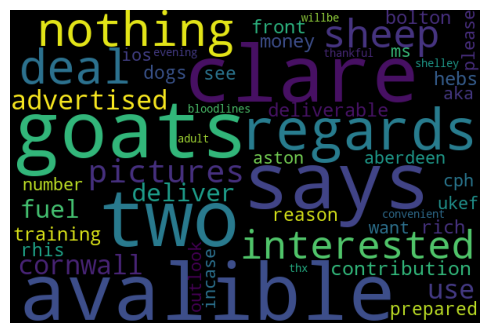

In [558]:
#Word Cloud
word_cloud_lda(17)

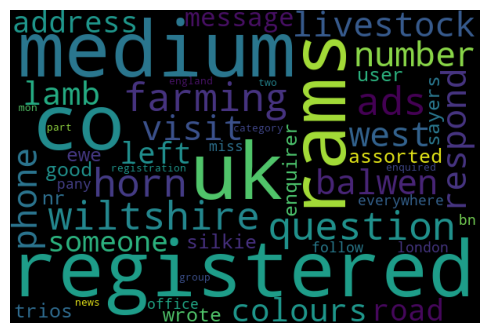

In [559]:
#Word Cloud
word_cloud_lda(18)

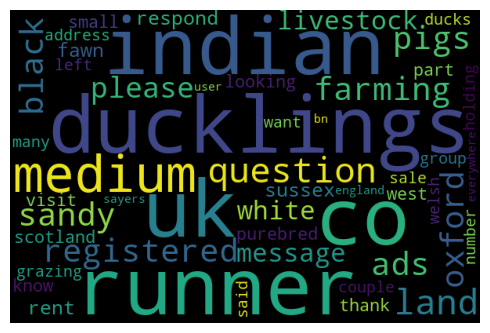

In [560]:
#Word Cloud
word_cloud_lda(19)